<h1 style="background-color:rgb(221, 83, 73); font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
<b>Obesity Risk Prediction</b>
</h1>

**Dataset Overview**

This notebook aims to analyze and predict obesity levels based on lifestyle, dietary habits, and personal characteristics.
[Dataset link](https://www.kaggle.com/competitions/playground-series-s4e2/data)

**Dataset**: Includes 2,111 observations with 17 dietary and physical lifestyle features from Colombia, Peru, and Mexico.

- **Age**: Age of the person in years

- **Gender**: Male/Female
- **Height**: in meters
- **Weight**: in kilograms
- **family_history_with_overweight**: Binary—Yes (family has obesity history), No (no obesity history).
- **FAVC (High-Calorie Food Consumption)**: Binary—Yes (frequent intake), No (low intake).
- **FCVC (Vegetable Intake Frequency)**: More than 2 means vegetables in every meal; 2 or less means not in every meal.(scale from 1 to 3)
- **NCP (Main Meals per Day)**: Number of main meals consumed daily.
- **CAEC (Sub-Meal Frequency)**: Four levels— No, Sometimes, Frequently, Always.
- **SMOKE (Smoking Status)**: Binary—Yes (smokes), No (never smoked).
- **CH2O (Water Intake)**: Amount of daily water intake in liters.
- **SCC (Calorie Monitoring)**: Binary—Yes (monitors calorie intake), No (does not monitor).
- **FAF (Physical Activity Frequency)**: Frequency of physical activity.(scale from 0 to 3)
- **TUE (Technology Use)**: Time spent on technological devices.(scale from 0 to 2)
- **CALC (Alcohol Intake)**: Binary—Yes (drinks alcohol), No (does not drink alcohol).
- **MTRANS (Means of Transportation)**: Five levels—Automobile, Motorbike, Bike, Public Transportation, Walking.
- **NObeyesdad (Target variable)**: 7 levels-  
  - Insufficient_Weight, 
  - Normal_Weight, 
  - Overweight_Level_I, 
  - Overweight_Level_II, 
  - Obesity_Type_I, 
  - Obesity_Type_II, 
  - Obesity_Type_III


# `01` Libraries

In [1]:
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
from lightgbm import LGBMClassifier

# `02` Load Data

In [2]:
df = pd.read_csv("../data/train.csv")

In [3]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
dict_vis={"id":"id",'FAVC':"high_cal_consumption", 'FCVC':"vegetable_consumption", "NCP":"meals_number", 
                              'CAEC':"eating_between_meals", "CH2O":"water_consumption", "SCC":"calorie_monitoring", 
                              "FAF":"physical_activity", "TUE":"screen_time", "CALC":"alcohole_consumption",
                              "MTRANS":"transportation_mode", "NObeyesdad":"obesity_level"
                              }

# `03` Simple Analysis & Exploratory Data Analysis (EDA) 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
numerical_features = list(df.select_dtypes('number').columns)
catgorical_features = list(df.select_dtypes('object').columns)
print(f"There are {len(catgorical_features)}, categorical features there are {catgorical_features}")
print(f"There are {len(numerical_features)}, numerical features there are {numerical_features}")

There are 9, categorical features there are ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
There are 9, numerical features there are ['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


<h1 style="background-color:rgb(218, 199, 198); font-family: newtimeroman; font-size: 100%; color: black; border-radius: 80px 20px; padding: 25px; text-align: left;">
<b>Need to check data for:</b>
</h1>

1. Consistency: no data value conflicts
1. Completeness: missing values
2. Uniquesness: no duplicates
3. Accuracy: data is real/represent reality
4. Validity: data format, type, range
5. Timeliness: avaliable when needed

In [7]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
df.duplicated().sum()

0

<h1 style="background-color:rgb(218, 199, 198); font-family: newtimeroman; font-size: 100%; color: black; border-radius: 80px 20px; padding: 25px; text-align: center;">
<b>There are no missing values nor duplicates, next we check data range and consistency</b>
</h1>

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


<h1 style="background-color:rgb(218, 199, 198); font-family: newtimeroman; font-size: 150%; color: black; border-radius: 80px 20px; padding: 25px; text-align: left;">
<b></b>

1. `Age` is from 14 to 61, with the median of 22 making the Age distribution right skewed
   1. might consider scaling/using log transformation to counter that
2. There are some columns that should have discrete values but have contious instead,EX:`NCP`: number of meals a day
   1. consider rounding / binning using `pd.cut`

   
</h1>

In [10]:
def outliers_summary(df):
    numerical_columns = df.select_dtypes(include=['int', 'float']).columns
    Q1 = df[numerical_columns].quantile(0.15)
    Q3 = df[numerical_columns].quantile(0.85)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_mask = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)

    outlier_counts = outliers_mask.sum(axis=0)

    total_rows = df.shape[0]
    outlier_percentage = (outlier_counts / total_rows)*100

    outliers_summary = pd.DataFrame({
        "Number of Outliers": outlier_counts,
        "Outlier Percentage": outlier_percentage
    })

    return outliers_summary.style.background_gradient(cmap='Set3')
outliers_summary(df)

,Number of Outliers,Outlier Percentage
id,0,0.000000
Age,86,0.414298
Height,0,0.000000
Weight,0,0.000000
FCVC,0,0.000000
NCP,0,0.000000
CH2O,0,0.000000
FAF,0,0.000000
TUE,0,0.000000


<h1 style="background-color:rgb(218, 199, 198); font-family: newtimeroman; font-size: 150%; color: black; border-radius: 80px 20px; padding: 25px; text-align: left;">
<b></b>

As notised earlier, Age is the only one that seemed to have notecible outliers,
- we will further inspect this using box-plots and other visualizations

   
</h1>

In [11]:
df.describe(include='object').T

,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


<h1 style="background-color:rgb(218, 199, 198); font-family: newtimeroman; font-size: 100%; color: black; border-radius: 80px 20px; padding: 25px; text-align: center;">
<b>Categorical variables have small range of values, making it easier to encode</b>
</h1>

In [12]:
def non_numeric_values(df, column_name):
    # Define a regular expression pattern to match numeric characters
    pattern = r'\D+'
    
    # Find non-numeric values using regular expression
    non_numeric_values = df[column_name].astype(str).str.findall(pattern)
    
    # Flatten the list of lists
    non_numeric_values = [item for sublist in non_numeric_values for item in sublist]
    
    # Use set to ensure uniqueness
    unique_non_numeric_values = set(non_numeric_values)
    
    return unique_non_numeric_values
for col in df.columns:
        print('*'*50)
        print(col)
        print(f"number of non numeric values:{len(non_numeric_values(df,col))}")
        print("*"*50)
        print(non_numeric_values(df,col))
        print()
    

**************************************************
id
number of non numeric values:0
**************************************************
set()

**************************************************
Gender
number of non numeric values:2
**************************************************
{'Female', 'Male'}

**************************************************
Age
number of non numeric values:1
**************************************************


{'.'}

**************************************************
Height
number of non numeric values:1
**************************************************
{'.'}

**************************************************
Weight
number of non numeric values:1
**************************************************
{'.'}

**************************************************
family_history_with_overweight
number of non numeric values:2
**************************************************
{'no', 'yes'}

**************************************************
FAVC
number of non numeric values:2
**************************************************
{'no', 'yes'}

**************************************************
FCVC
number of non numeric values:1
**************************************************
{'.'}

**************************************************
NCP
number of non numeric values:1
**************************************************
{'.'}

**************************************************
CAEC
number of non numeric 

In [13]:
df[df['FAF'].astype(str).str.contains('e-', na=False)]
# 0.000096 -> 9.6*e-6 


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
531,531,Female,25.954511,1.627818,109.982692,yes,yes,3.0,3.0,Sometimes,no,2.217348,no,0.000096,0.554150,Sometimes,Public_Transportation,Obesity_Type_III
894,894,Female,25.918524,1.611462,109.984263,yes,yes,3.0,3.0,Sometimes,no,2.675567,no,0.000096,0.754023,Sometimes,Public_Transportation,Obesity_Type_III
4468,4468,Female,25.920738,1.611462,109.984263,yes,yes,3.0,3.0,Sometimes,no,2.471721,no,0.000096,0.433463,Sometimes,Public_Transportation,Obesity_Type_III
8222,8222,Female,26.000000,1.639251,109.984263,yes,yes,3.0,3.0,Sometimes,no,2.791604,no,0.000096,0.929356,Sometimes,Public_Transportation,Obesity_Type_III
8913,8913,Female,25.964788,1.633195,109.984263,yes,yes,3.0,3.0,Sometimes,no,2.471721,no,0.000096,0.433463,Sometimes,Public_Transportation,Obesity_Type_III
9301,9301,Female,25.954511,1.630927,109.980145,yes,yes,3.0,3.0,Sometimes,no,2.707201,no,0.000096,0.656491,Sometimes,Public_Transportation,Obesity_Type_III
15296,15296,Female,25.920738,1.640745,109.984263,yes,yes,3.0,3.0,Sometimes,no,2.653531,no,0.000096,0.552006,Sometimes,Public_Transportation,Obesity_Type_III
16358,16358,Female,25.967010,1.627532,109.984263,yes,yes,3.0,3.0,Sometimes,no,1.512035,no,0.000096,0.465607,Sometimes,Public_Transportation,Obesity_Type_III
17667,17667,Female,25.989938,1.634894,109.931233,yes,yes,3.0,3.0,Sometimes,no,1.042989,no,0.000096,0.413474,Sometimes,Public_Transportation,Obesity_Type_III
20522,20522,Female,25.994746,1.639524,109.984263,yes,yes,3.0,3.0,Sometimes,no,1.444379,no,0.000096,0.711331,Sometimes,Public_Transportation,Obesity_Type_III


<h1 style="background-color:rgb(218, 199, 198); font-family: newtimeroman; font-size: 100%; color: black; border-radius: 80px 20px; padding: 25px; text-align: center;">
<b>FAF: represent the frequency of physical activity.(scale from 0 to 3), so 0.000096 should probably translate to 0 </b>
</h1>

In [14]:
def is_negative(df):
    numerical_col = df.select_dtypes(include=['int', 'float']).columns
    for col in numerical_col:
        if df[col][df[col]<0].any():
            print(col,len(df[col][df[col]<0]))
        else:
            print("No negative values")
            
is_negative(df)

No negative values
No negative values
No negative values
No negative values
No negative values
No negative values
No negative values
No negative values
No negative values


<h1 style="background-color:rgb(218, 199, 198); font-family: newtimeroman; font-size: 100%; color: black; border-radius: 80px 20px; padding: 25px; text-align: center;">
<b>In the context of our dataset , there shouldn't be any negative values as every field would represent either a frequecy or a number

After inspection: there is no negative values, however they could be some after scaling </b>
</h1>

In [15]:
for col in catgorical_features:
    print(f"===================== {col} ======================")
    print(df[col].value_counts()/len(df)*100)
    print()

===================== Gender ======================
Gender
Female    50.207149
Male      49.792851
Name: count, dtype: float64

===================== family_history_with_overweight ======================
family_history_with_overweight
yes    81.96358
no     18.03642
Name: count, dtype: float64

===================== FAVC ======================
FAVC
yes    91.444262
no      8.555738
Name: count, dtype: float64

===================== CAEC ======================
CAEC
Sometimes     84.444551
Frequently    11.908662
Always         2.302727
no             1.344060
Name: count, dtype: float64

===================== SMOKE ======================
SMOKE
no     98.819732
yes     1.180268
Name: count, dtype: float64

===================== SCC ======================
SCC
no     96.690433
yes     3.309567
Name: count, dtype: float64

===================== CALC ======================
CALC
Sometimes     72.579247
no            24.872338
Frequently     2.548415
Name: count, dtype: float64

==============

<h1 style="background-color:rgb(218, 199, 198); font-family: newtimeroman; font-size: 100%; color: black; border-radius: 80px 20px; padding: 25px; text-align: left;">
<b>Some columns have highly imbalanced data offering low variability: meaning that the model may not learn much from it

- EX: `SMOKE` 
    - no     98.819732%
    - yes    1.180268%

- `SCC`
    - no     96.690433%
    - yes     3.309567%

 </b>
</h1>

In [16]:
# target variable
df['NObeyesdad'].value_counts()/len(df) *100

NObeyesdad
Obesity_Type_III       19.491280
Obesity_Type_II        15.646979
Normal_Weight          14.847288
Obesity_Type_I         14.018692
Insufficient_Weight    12.154350
Overweight_Level_II    12.149533
Overweight_Level_I     11.691878
Name: count, dtype: float64

<h1 style="background-color:rgb(218, 199, 198); font-family: newtimeroman; font-size: 100%; color: black; border-radius: 80px 20px; padding: 25px; text-align: left;">
<b>target variable is slightly imbalanced, 
need to consider adjusting 'class_wights' or using oversampling technique like SMOT</b>
</h1>

# `04` Data Visualization

## Univariate
See the distribution using bar plots and histograms to know more about the data

In [17]:
df_vis = df.copy()

In [18]:
# funciton that make equal-width-binning on the scaling columns
def equal_width_binning(data:pd.DataFrame, col_name:str, bins:int, labels:list, object:int):
    data = data.copy()
    print(pd.cut(data[col_name], bins=bins).cat.categories)
    
    # convert the column from categorical to object datatype
    if object == 1:
        data[col_name] = pd.cut(data[col_name], bins=bins, labels=labels)
        data[col_name] = data[col_name].astype('object')
        return data[col_name]
    
    # convert the column from categorical to integer datatype
    elif object == 0:
        data[col_name] = pd.cut(data[col_name], bins=bins, labels=labels)
        data[col_name] = data[col_name].astype('int32')
        return data[col_name]    

In [19]:
# Apply Function on [vegetable_consumption, screen_time]
target_columns = ['FCVC', 'TUE', 'CH2O']
for col in target_columns:
    df_vis[col] = equal_width_binning(df_vis, col, 3, ['low', 'medium', 'high'], object=1)
    print(df_vis[col])
    print("\n================================================================\n")

# Apply Function on physical_activity
df_vis['FAF'] = equal_width_binning(df_vis, 'FAF', 4, ['Sedentary', 'Light Activity', 'Moderate Activity', 'High Activity'], object=1)
print(df_vis['FAF'])
print("================================================================\n")

# Apply Function on meals_number
df_vis['NCP'] = equal_width_binning(df_vis, 'NCP', 4, [1, 2, 3, 4], object=0)
print(df_vis['NCP'])
print("\n================================================================")

IntervalIndex([(0.998, 1.667], (1.667, 2.333], (2.333, 3.0]], dtype='interval[float64, right]')
0        medium
1        medium
2        medium
3          high
4          high
          ...  
20753      high
20754      high
20755      high
20756      high
20757      high
Name: FCVC, Length: 20758, dtype: object


IntervalIndex([(-0.002, 0.667], (0.667, 1.333], (1.333, 2.0]], dtype='interval[float64, right]')
0        medium
1        medium
2          high
3        medium
4        medium
          ...  
20753       low
20754    medium
20755    medium
20756    medium
20757    medium
Name: TUE, Length: 20758, dtype: object


IntervalIndex([(0.998, 1.667], (1.667, 2.333], (2.333, 3.0]], dtype='interval[float64, right]')
0          high
1        medium
2        medium
3        medium
4        medium
          ...  
20753    medium
20754       low
20755    medium
20756    medium
20757    medium
Name: CH2O, Length: 20758, dtype: object


IntervalIndex([(-0.003, 0.75], (0.75, 1.5], (1.5, 2.25]

In [20]:
train_categorical_visualization = df_vis.select_dtypes(include="object")
train_categorical_visualization.shape

(20758, 13)

C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\705019625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_vis, x=col,palette='Set2');
C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\705019625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_vis, x=col,palette='Set2');
C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\705019625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_vis, x=col,palette='Set2');
C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\705019625.py:6: FutureWarning: 

Passing `palette` 

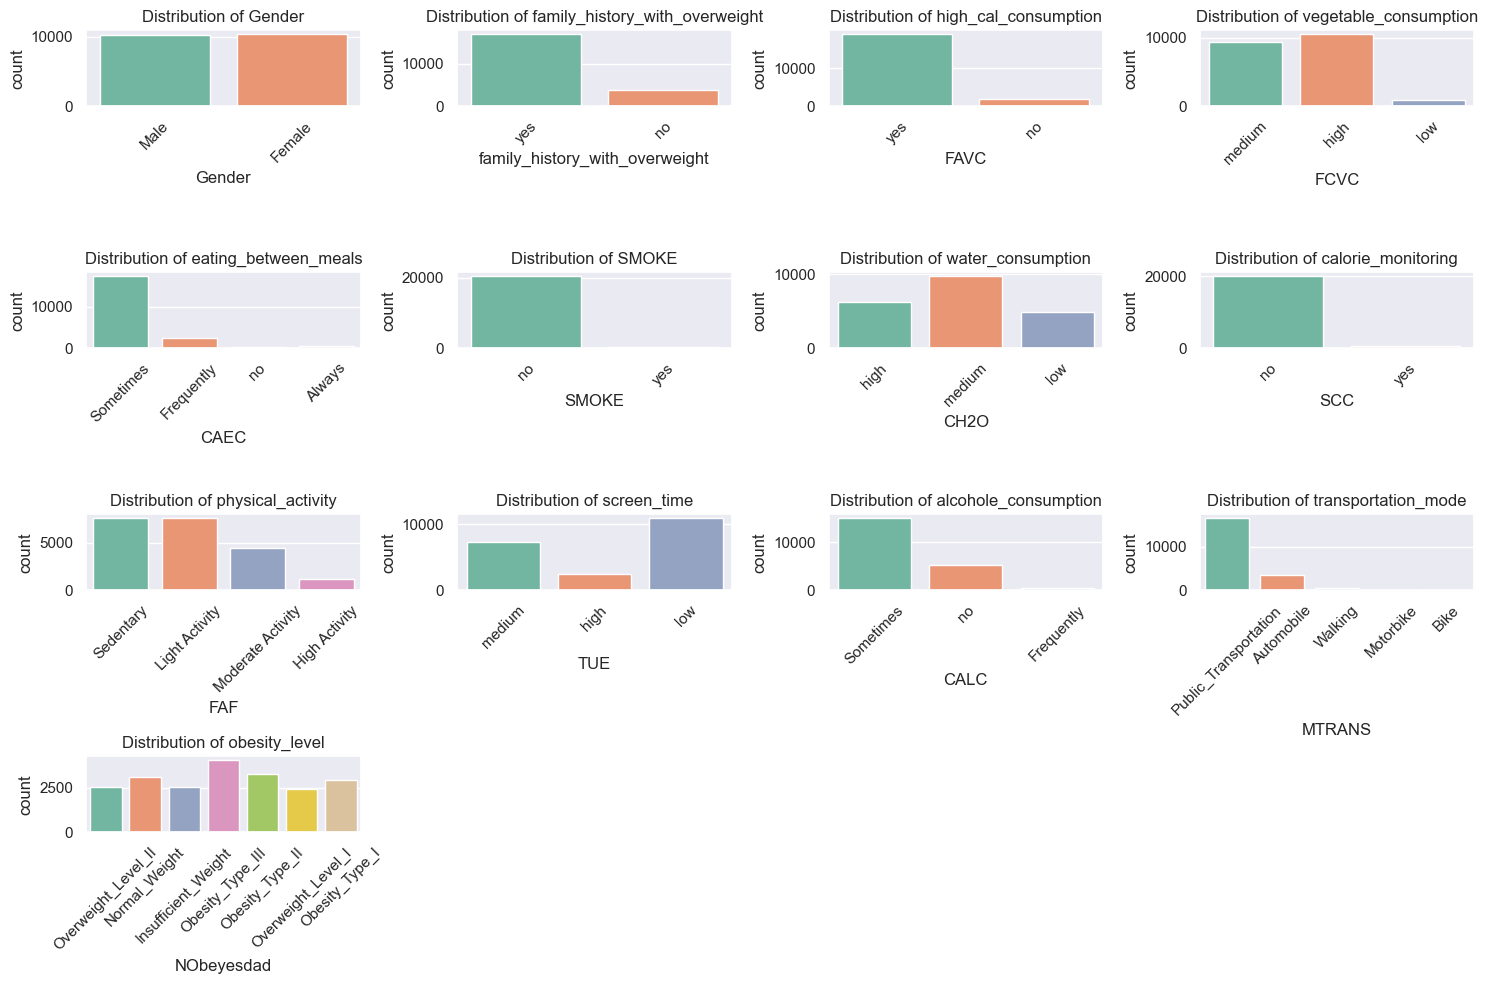

In [21]:
sns.set(style="darkgrid")

plt.figure(figsize=(15, 10))
for i, col in enumerate(train_categorical_visualization, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df_vis, x=col,palette='Set2');
    plt.xticks(rotation = 45)
    if col in dict_vis.keys():
        plt.title(f"Distribution of {dict_vis[col]}")
    else:
        plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

================== Gender ===================


C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\3519230926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_categorical_visualization, x=col, palette='Set2')


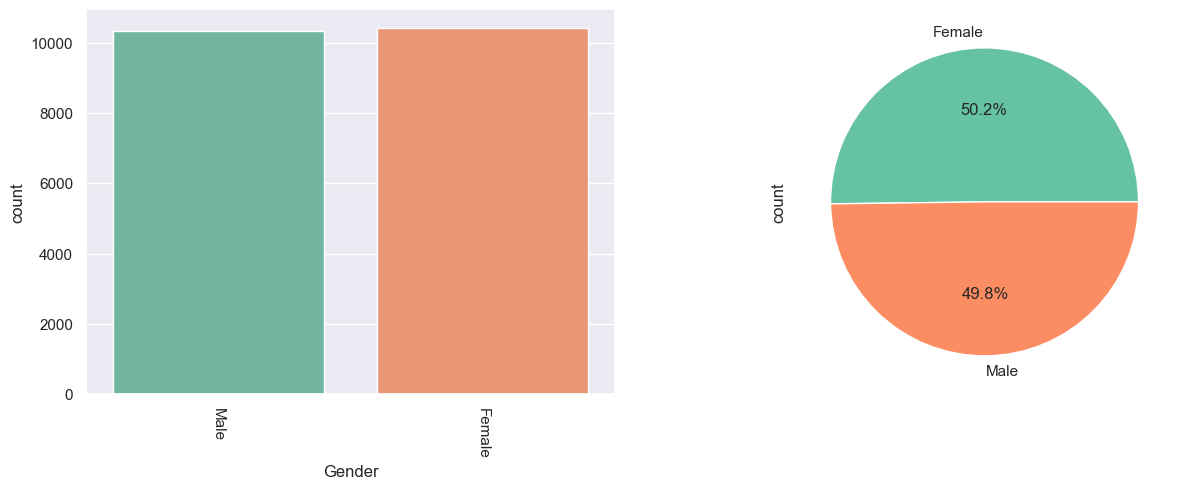

================== family_history_with_overweight ===================


C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\3519230926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_categorical_visualization, x=col, palette='Set2')


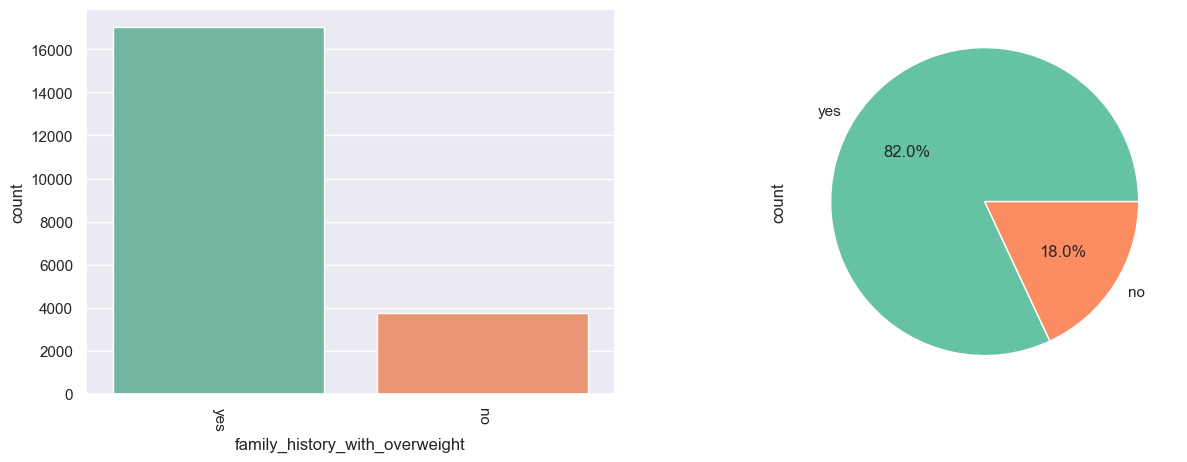

================== FAVC ===================


C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\3519230926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_categorical_visualization, x=col, palette='Set2')


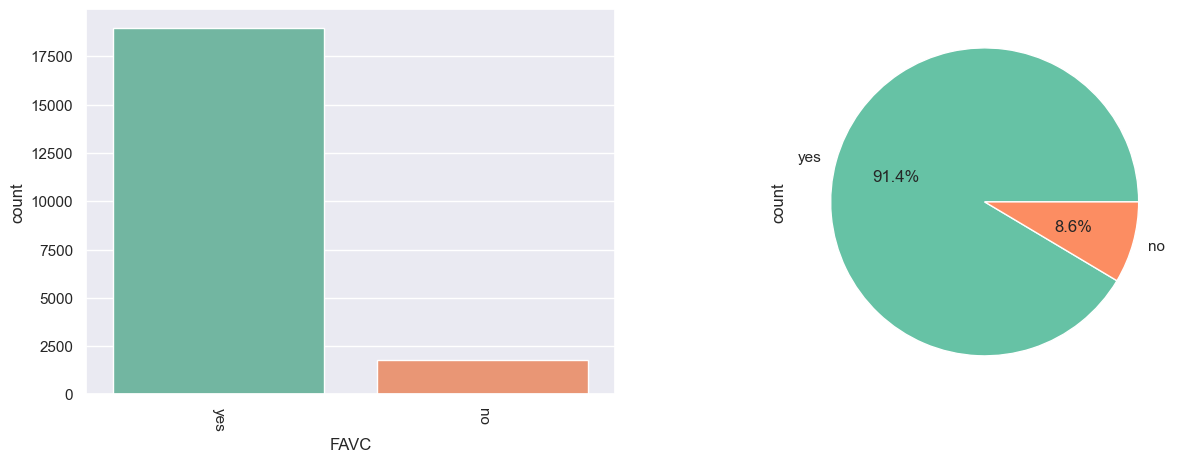

================== FCVC ===================


C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\3519230926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_categorical_visualization, x=col, palette='Set2')


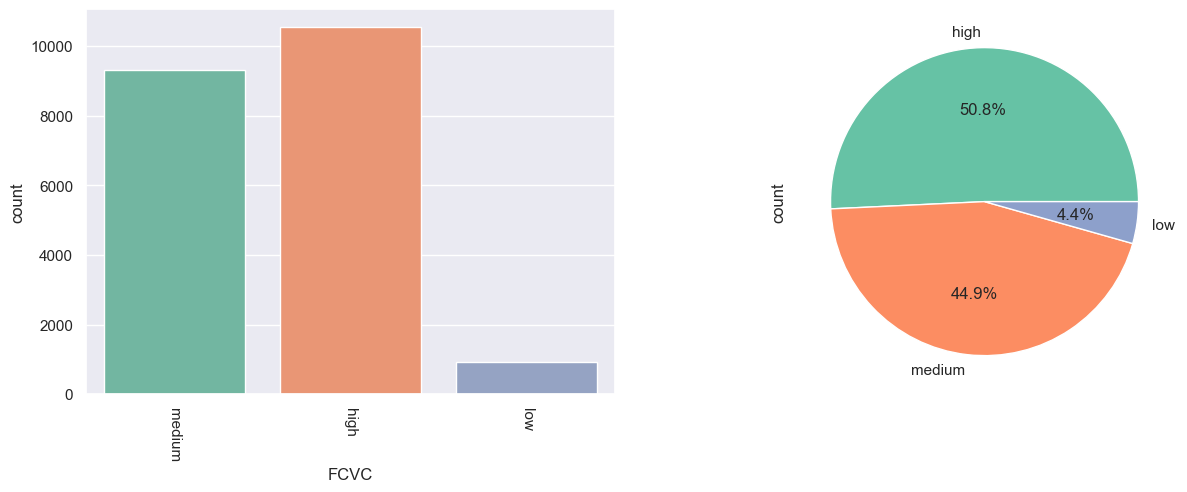

================== CAEC ===================


C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\3519230926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_categorical_visualization, x=col, palette='Set2')


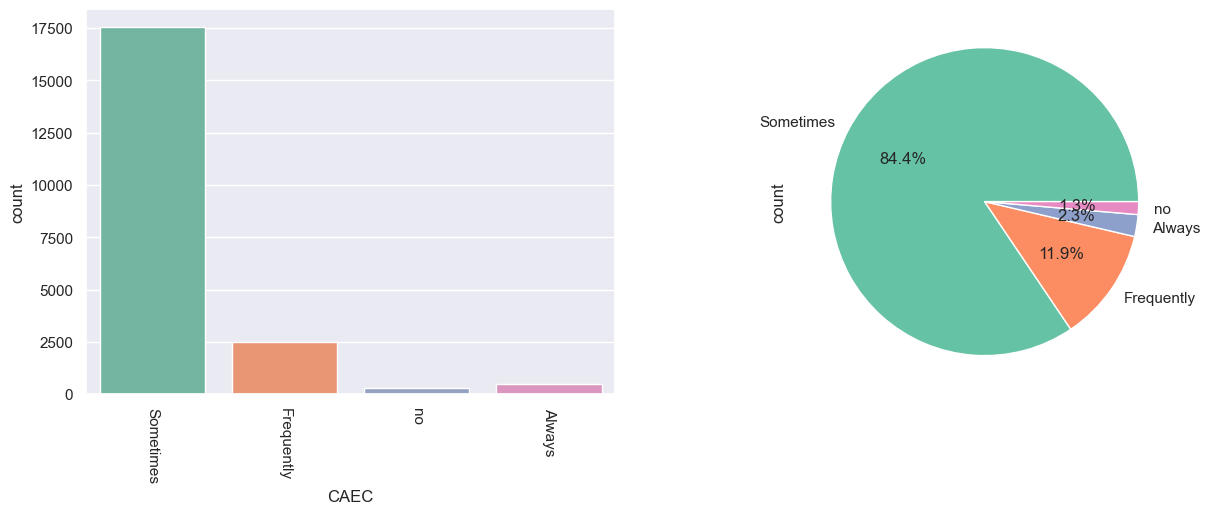

================== SMOKE ===================


C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\3519230926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_categorical_visualization, x=col, palette='Set2')


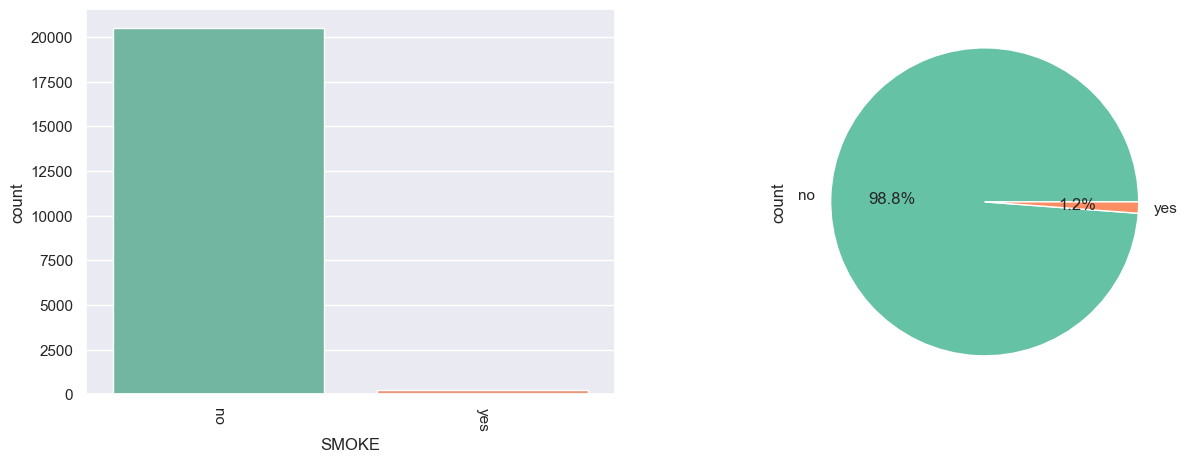

================== CH2O ===================


C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\3519230926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_categorical_visualization, x=col, palette='Set2')


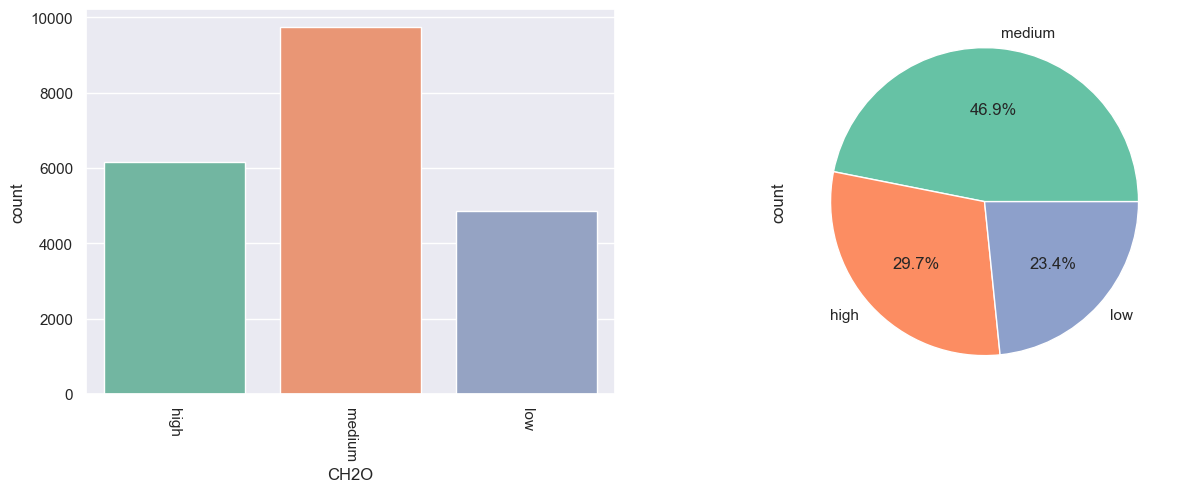

================== SCC ===================


C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\3519230926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_categorical_visualization, x=col, palette='Set2')


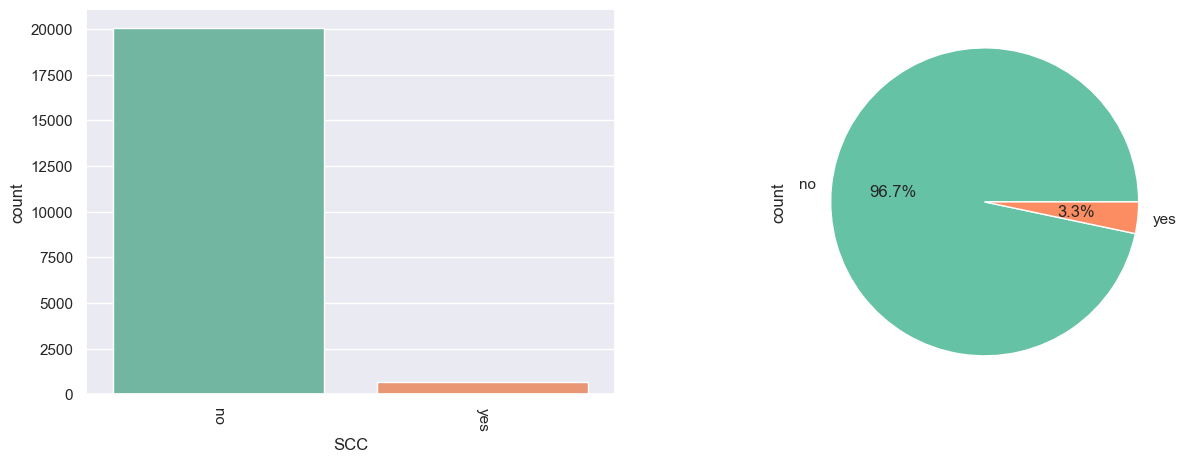

================== FAF ===================


C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\3519230926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_categorical_visualization, x=col, palette='Set2')


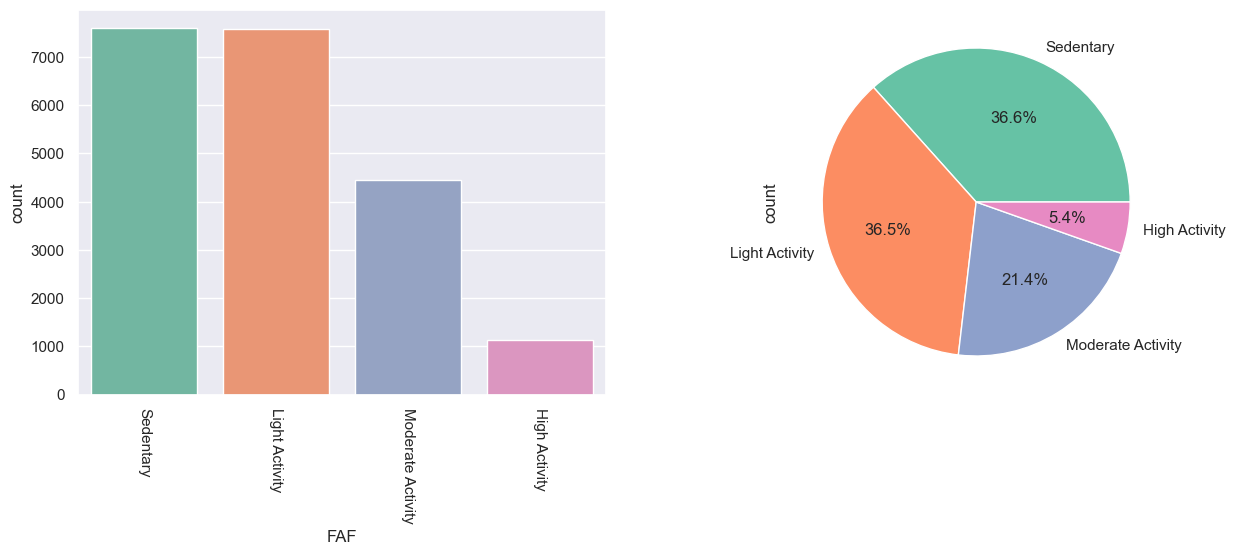

================== TUE ===================


C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\3519230926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_categorical_visualization, x=col, palette='Set2')


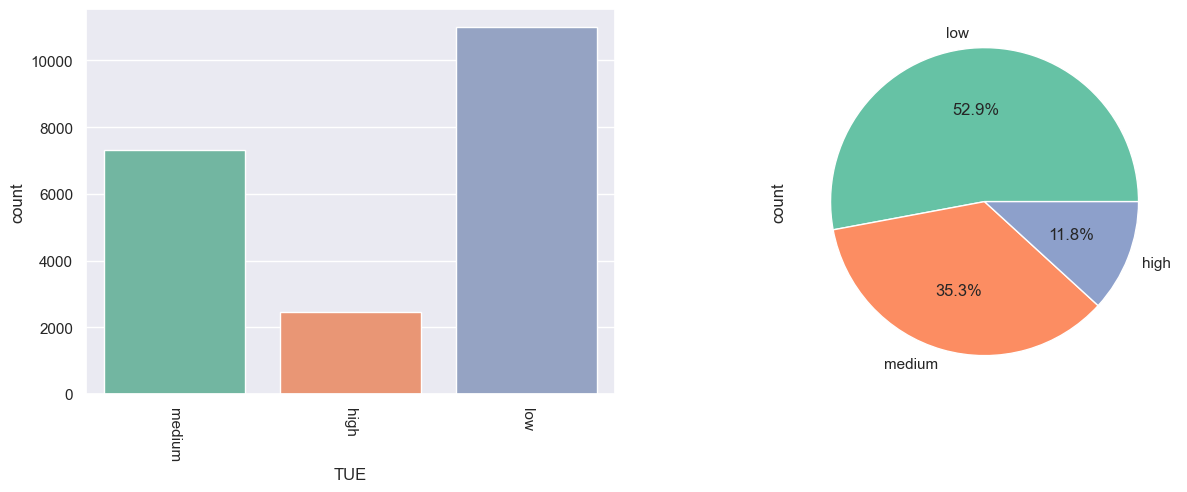

================== CALC ===================


C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\3519230926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_categorical_visualization, x=col, palette='Set2')


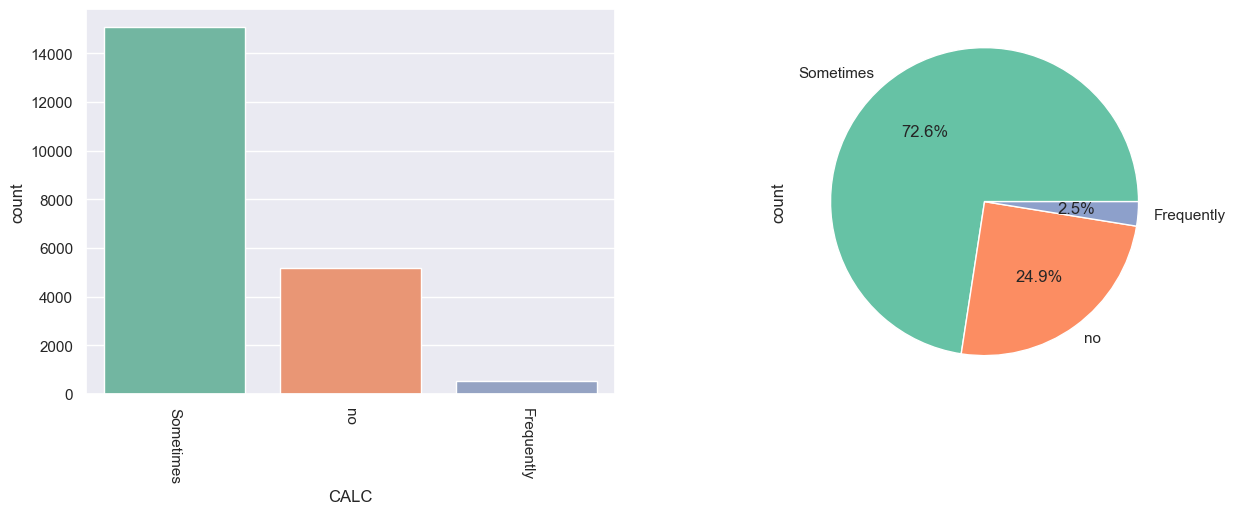

================== MTRANS ===================


C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\3519230926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_categorical_visualization, x=col, palette='Set2')


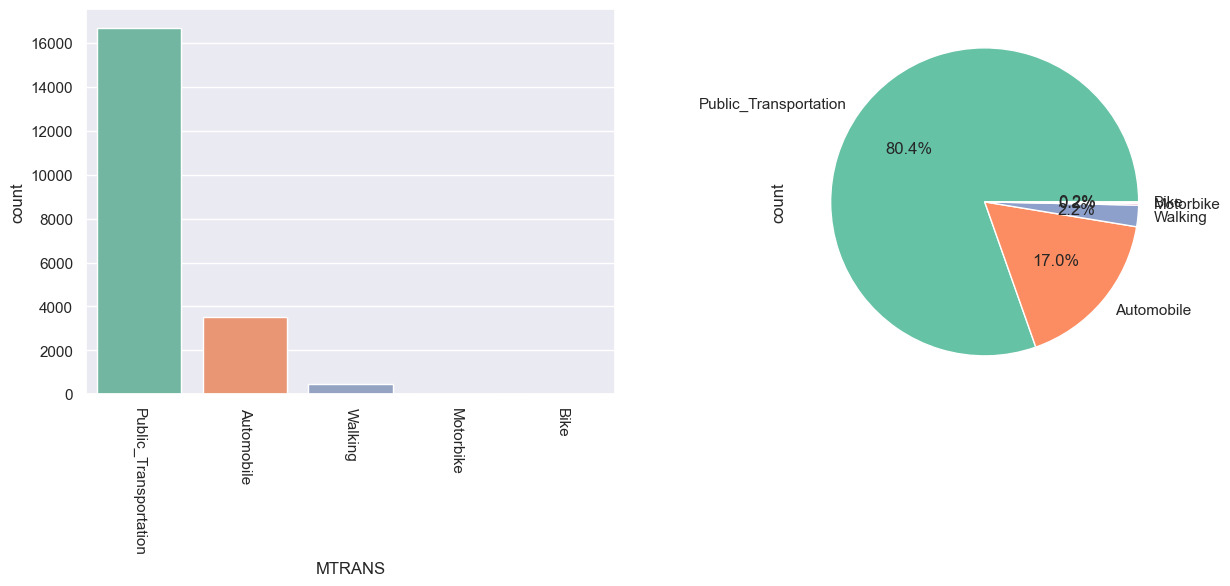

================== NObeyesdad ===================


C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\3519230926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_categorical_visualization, x=col, palette='Set2')


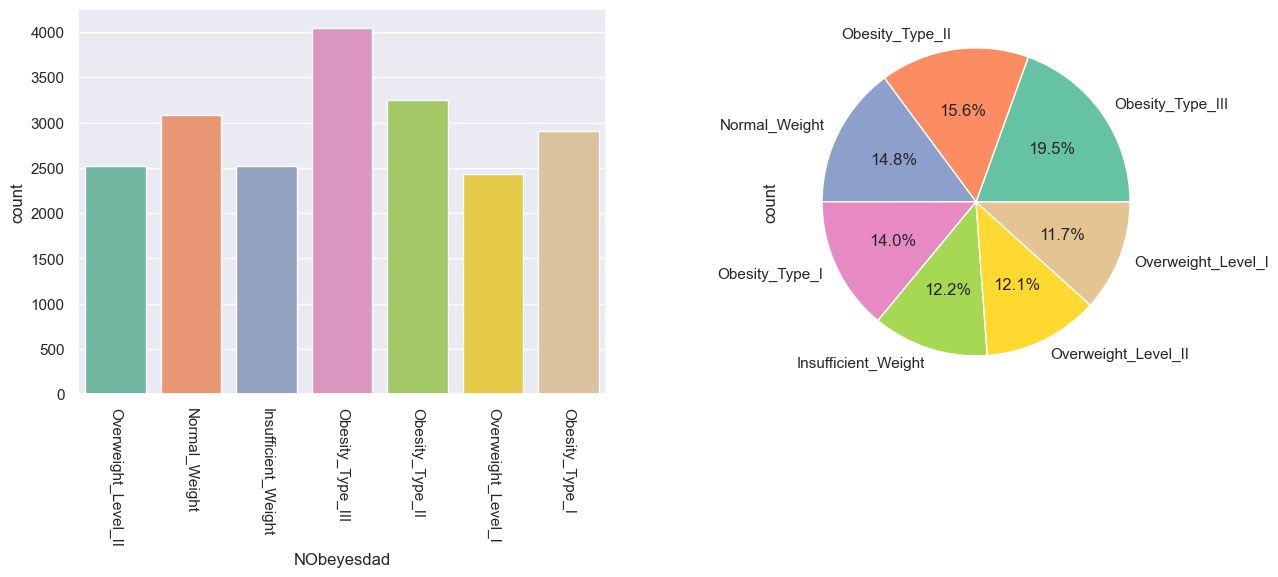

In [22]:
for col in train_categorical_visualization:
    print(f"================== {col} ===================")
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.xticks(rotation=270)
    sns.countplot(data=train_categorical_visualization, x=col, palette='Set2')

    plt.subplot(1,2,2)
    train_categorical_visualization[col].value_counts().plot(kind='pie', autopct="%1.1f%%", colors=sns.color_palette('Set2'))
    
    plt.show()

<h1 style="background-color:rgb(218, 199, 198); font-family: newtimeroman; font-size: 100%; color: black; border-radius: 80px 20px; padding: 25px; text-align: left;">
<b> Visualization enforce what we concluded earlier
that 'some columns have highly imbalanced data offering low variability: meaning that the model may not learn much from it'

we can consider dropping them or use feature engineering to introduce new feature 
 </b>
</h1>

C:\Users\aliay\AppData\Local\Temp\ipykernel_6392\3315471862.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='NObeyesdad',order=category_order, palette='Set2')


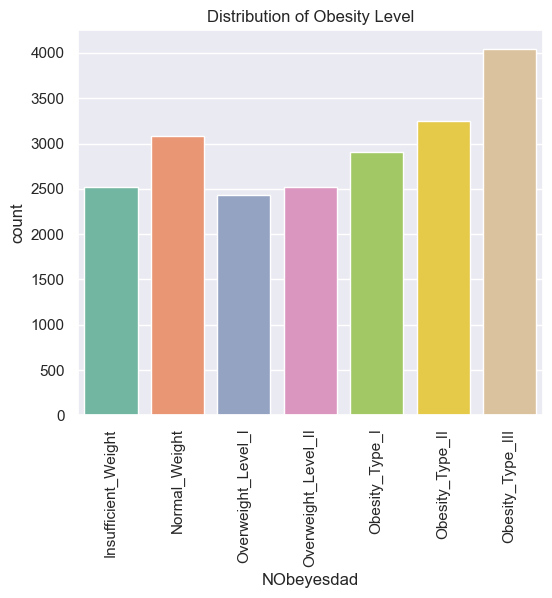

In [23]:
category_order = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III"
]
sns.set_palette('Set2')
y = df['NObeyesdad']
plt.figure(figsize=(6,5))
plt.xticks(rotation=90)
sns.countplot(df,x='NObeyesdad',order=category_order, palette='Set2')
plt.title("Distribution of Obesity Level")
plt.show()

In [24]:
train_numeric_visualization = df_vis.select_dtypes(exclude="object")
train_numeric_visualization.shape

(20758, 5)

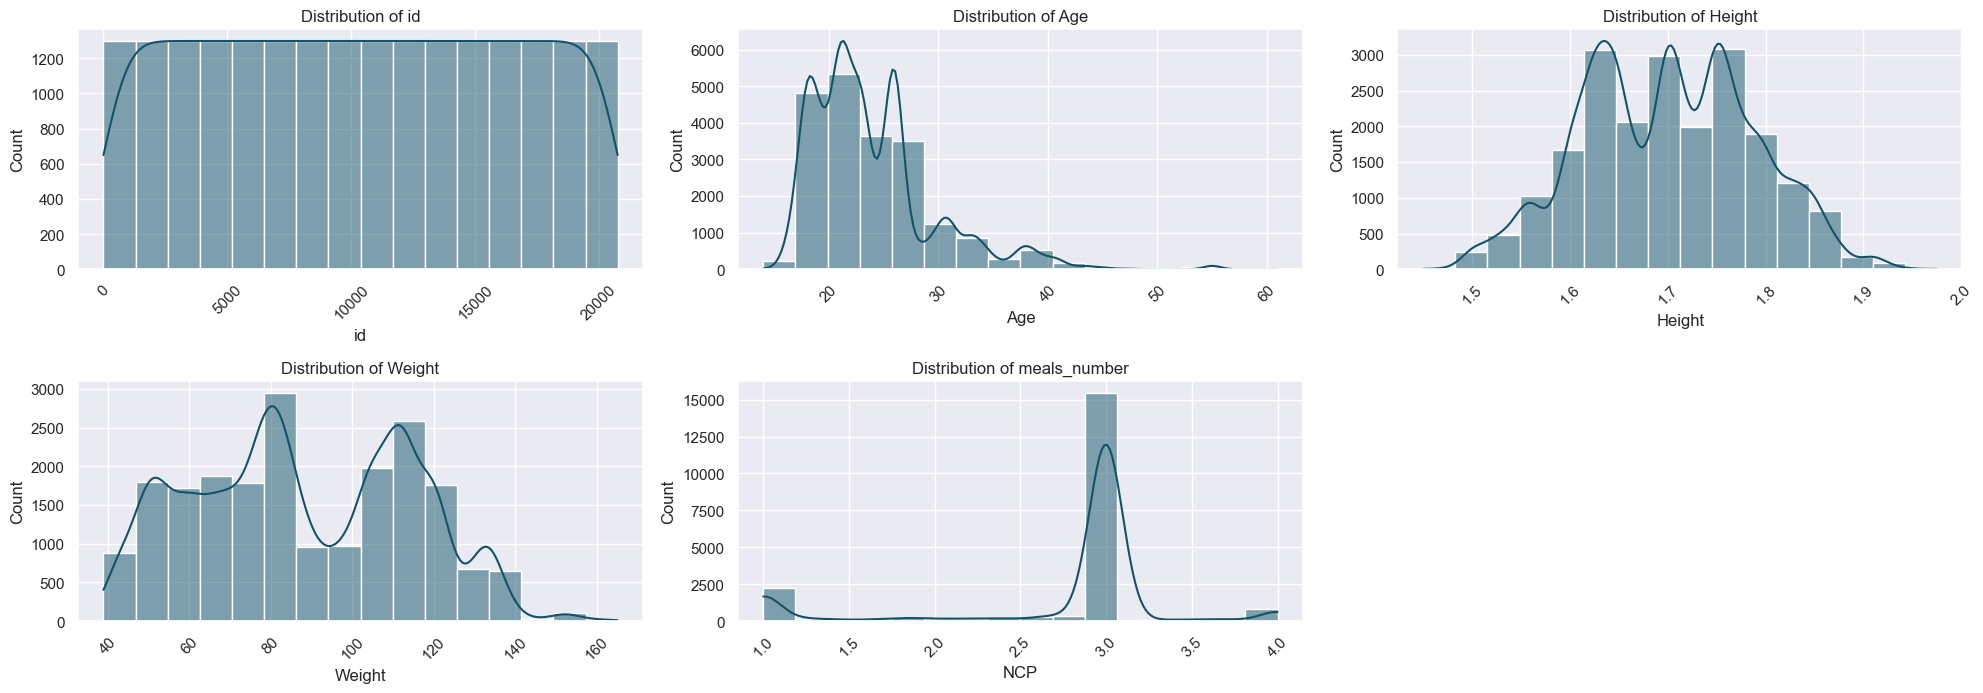

In [25]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(train_numeric_visualization, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, kde=True,bins=16,color='#125368');
    plt.xticks(rotation = 45)
    if col in dict_vis.keys():
        plt.title(f"Distribution of {dict_vis[col]}")
    else:
        plt.title(f"Distribution of {col}")
    

plt.tight_layout()
plt.show()

<h1 style="background-color:rgb(218, 199, 198); font-family: newtimeroman; font-size: 100%; color: black; border-radius: 80px 20px; padding: 25px; text-align: left;">
<b> 

`Weight` and `Height` are normally distibuted, while `Age` is right skewed, might consider scaling/using log transformation to counter that

after binning `NCP` became 1,2,3 or 4; 3 being the highest value
 </b>
</h1>

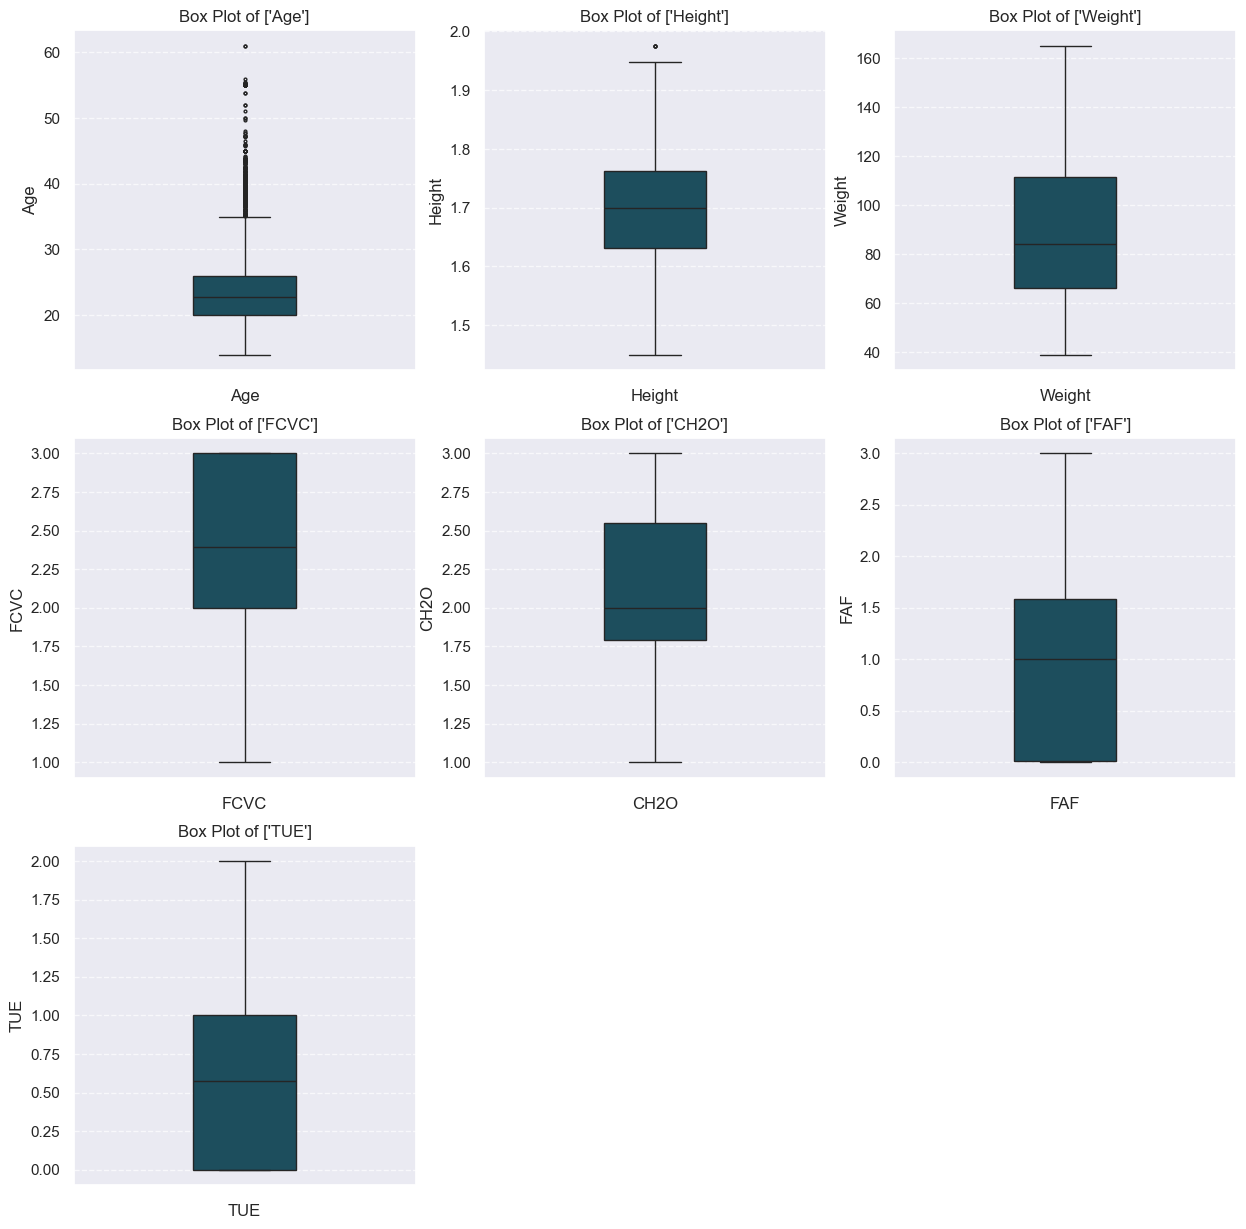

In [26]:
# Making Box plots to identify outliers
import math
# List of columns for box plots
columns_box = ['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'TUE']

# Determine the grid size dynamically
num_cols = len(columns_box)
rows = math.ceil(num_cols / 3)  # 3 columns per row

# Set up the figure
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten axes for easy iteration

# Create box plots using Seaborn
for i, col in enumerate(columns_box):
    sns.boxplot(y=df[col], ax=axes[i], color='#125368', width=0.3, fliersize=2)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_title(f"Box Plot of {[col]}", fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)           # Add grid for better readability

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.subplots_adjust()
plt.show()

<h1 style="background-color:rgb(218, 199, 198); font-family: newtimeroman; font-size: 100%; color: black; border-radius: 80px 20px; padding: 25px; text-align: left;">
<b>  

- `Age`
The median age is around 20-25 years.
Several outliers exist above 40 years, indicating some significantly older individuals in the dataset.

- `Height`
The majority of heights fall between 1.6m and 1.8m.
There is one outlier above 1.9m, possibly indicating an exceptionally tall person.

- `Weight`
The weight distribution is fairly normal.
Some extreme values are observed above 160 kg, suggesting overweight individuals in the dataset.

- The rest has no significant outliers
- `TUE` (Time Using Electronic Devices)
The median TUE value is quite low.
The range suggests limited electronic device usage.
but as we know most participants are quite young, making their electronic device usage naturally high
either there was a scaling error or a understatement from the participants
  
 </b>
</h1>


## Bivariate

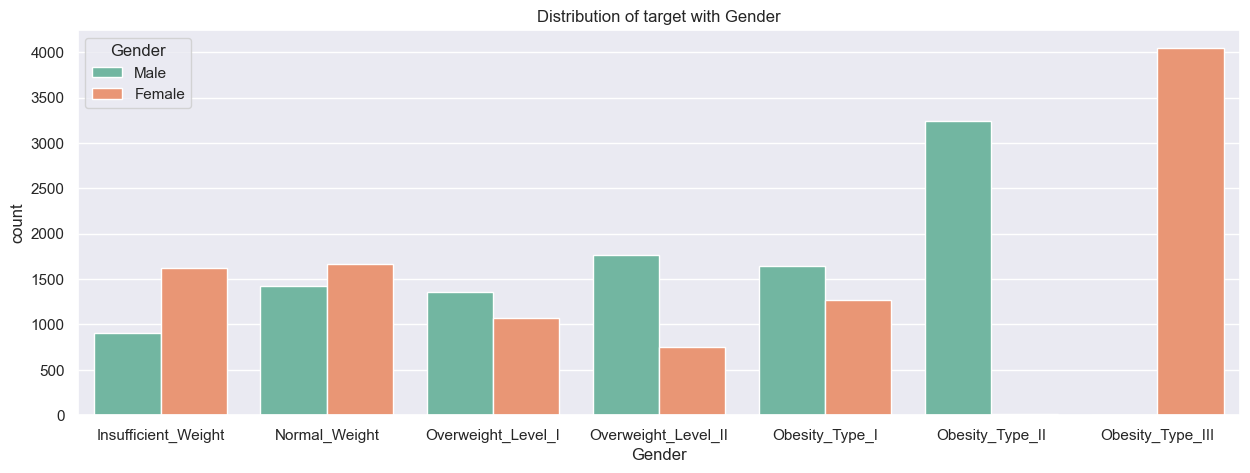

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['NObeyesdad'], hue=df['Gender'], palette='Set2',order=category_order)
plt.title('Distribution of target with Gender')
plt.xlabel('Gender')
plt.legend(title='Gender', loc='upper left')
plt.show()

<h1 style="background-color:rgb(218, 199, 198); font-family: newtimeroman; font-size: 100%; color: black; border-radius: 80px 20px; padding: 25px; text-align: left;">
<b> we can see that 

- Obesity Type III is more prevalent in females.

- Obesity Type II is more common in males.

- Insufficient weight conditions appear more frequently in females.

- Overweight, normal weight Obesity Type I categories show a more balanced distribution between genders.
 </b>
</h1>

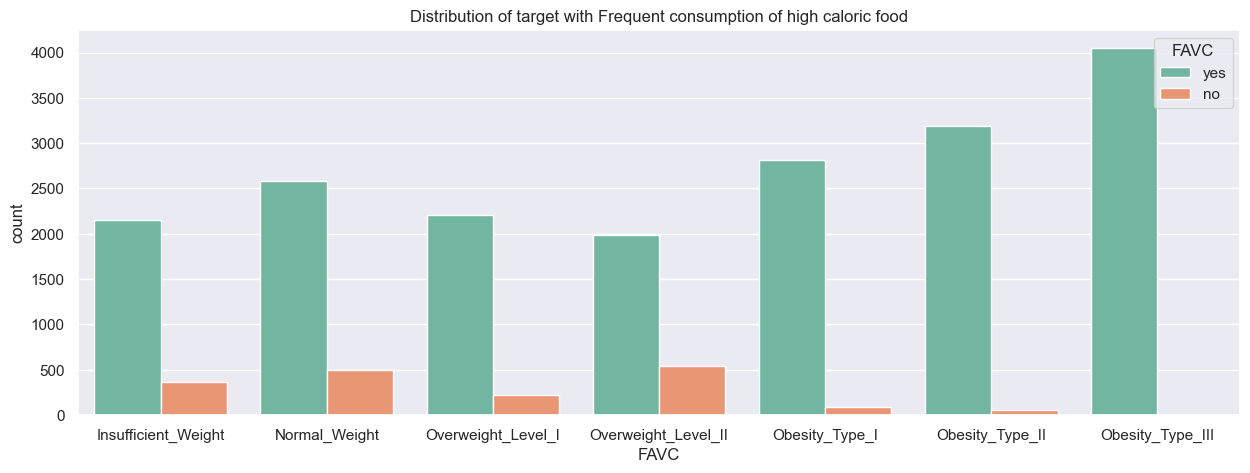

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['NObeyesdad'], hue=df['FAVC'], palette='Set2',order=category_order)
plt.title('Distribution of target with Frequent consumption of high caloric food')
plt.xlabel('FAVC')
plt.legend(title='FAVC', loc='upper right')
plt.show()


<h1 style="background-color:rgb(218, 199, 198); font-family: newtimeroman; font-size: 100%; color: black; border-radius: 80px 20px; padding: 25px; text-align: left;">
<b> But again most people in this dataset eat high caloric food

`FAVC`
- yes    91.444262%
- no      8.555738%
 </b>
</h1>

### Each Column With Target Column [obesity_level]

====================================================== Gender =======================================================



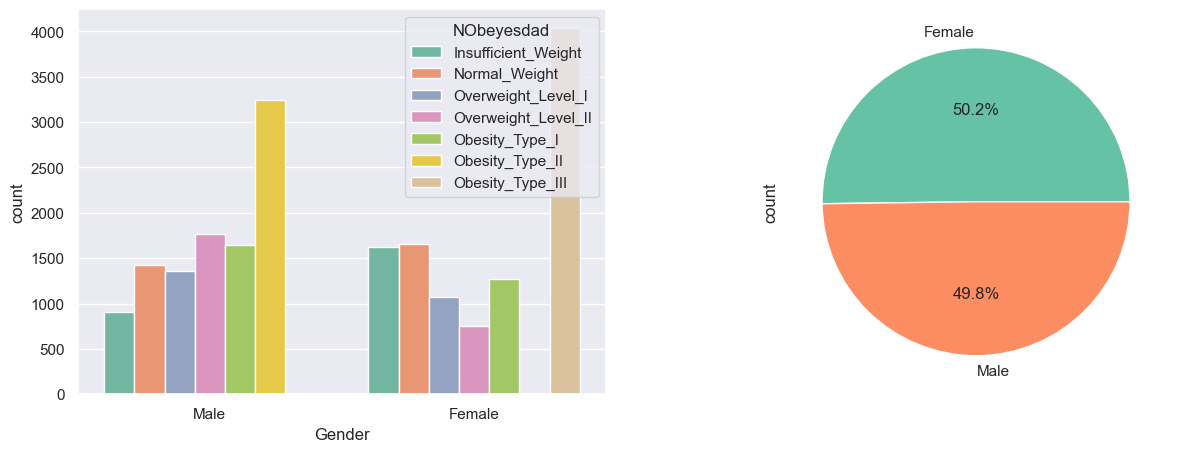

====================================================== family_history_with_overweight =======================================================



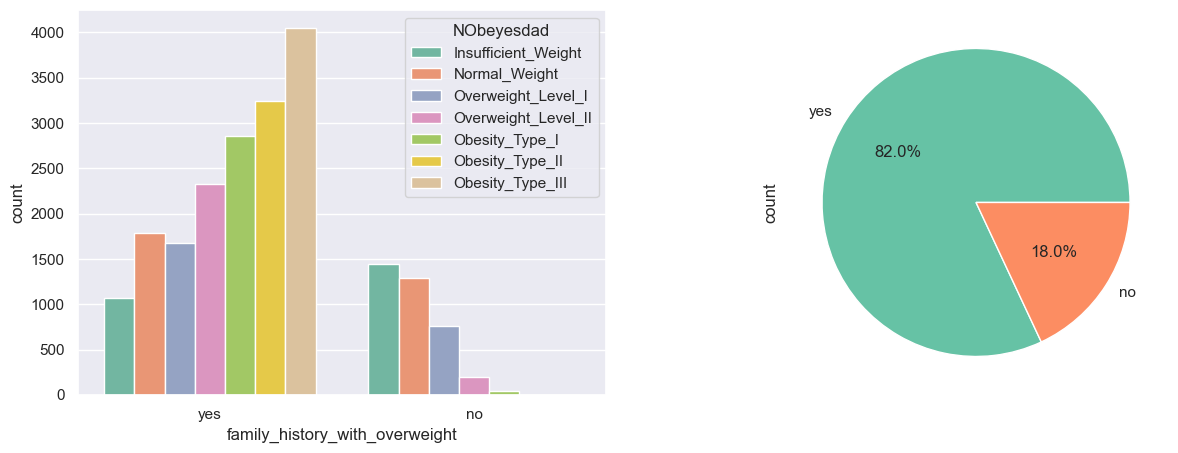

====================================================== FAVC =======================================================



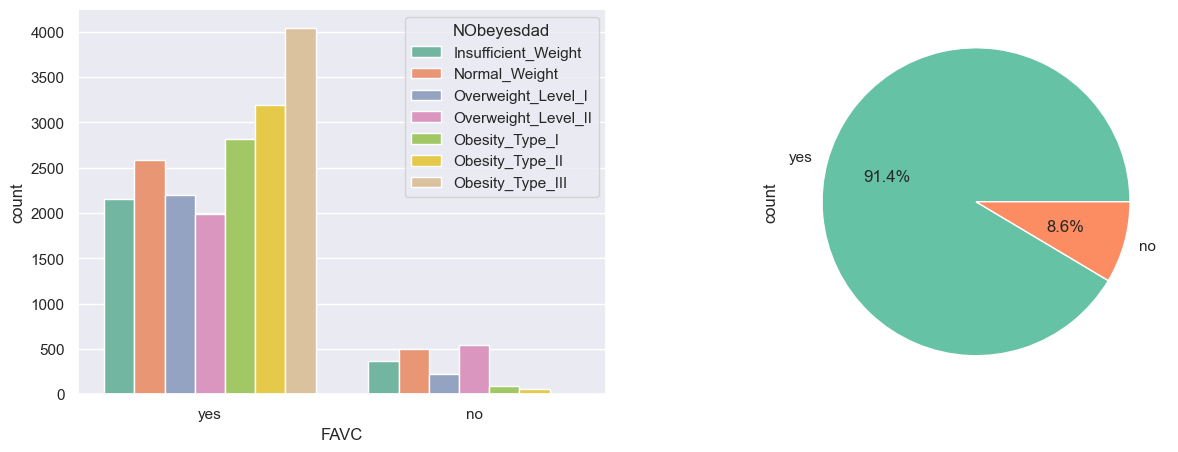

====================================================== FCVC =======================================================



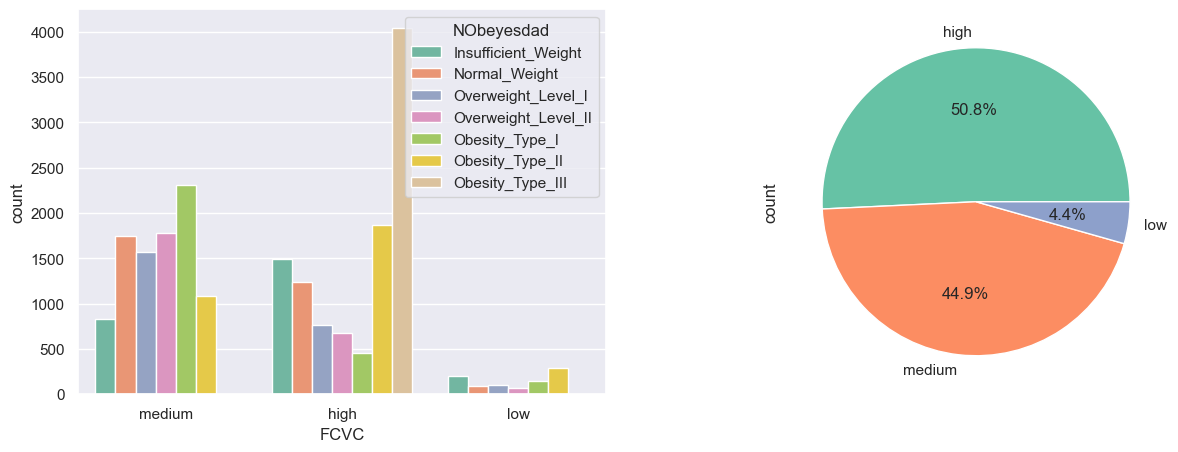

====================================================== CAEC =======================================================



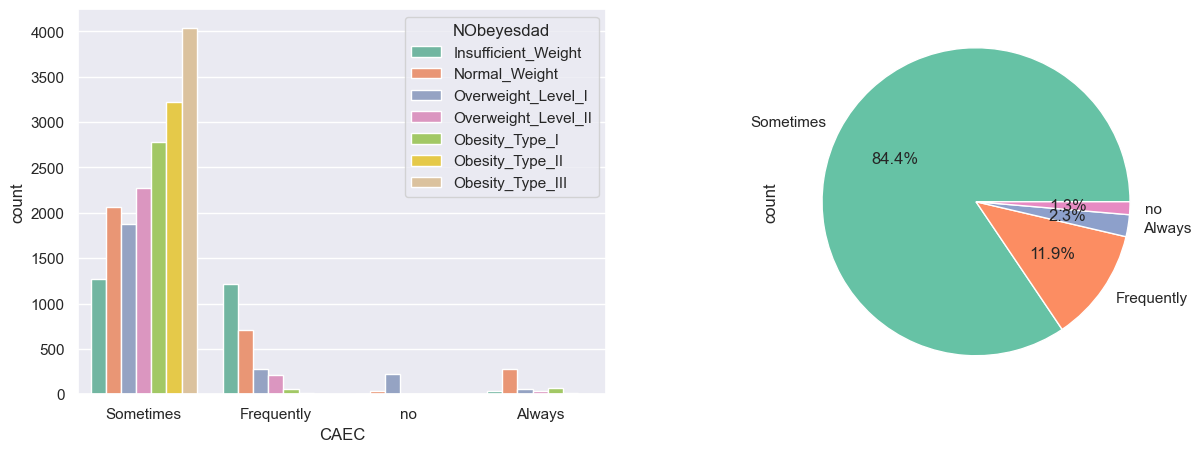

====================================================== SMOKE =======================================================



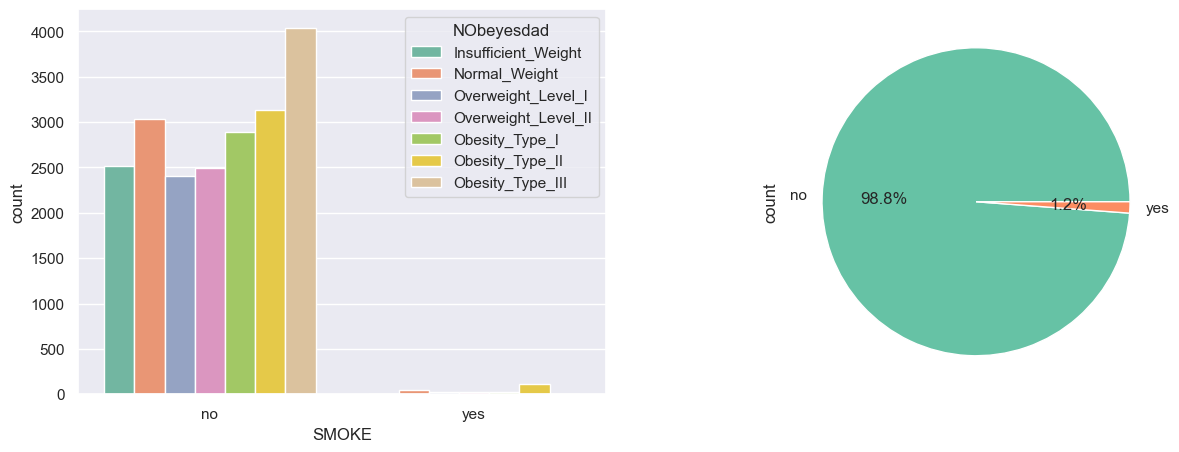

====================================================== CH2O =======================================================



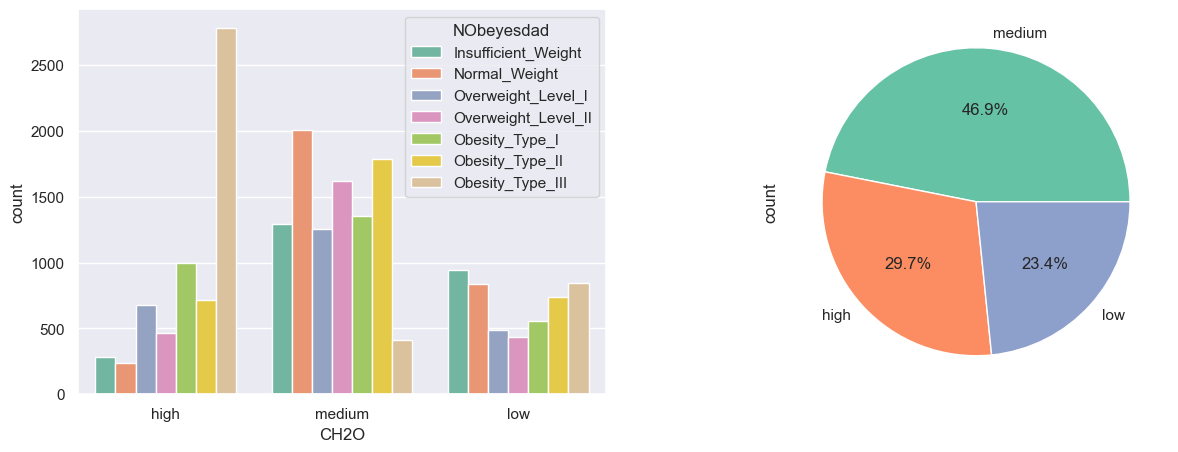

====================================================== SCC =======================================================



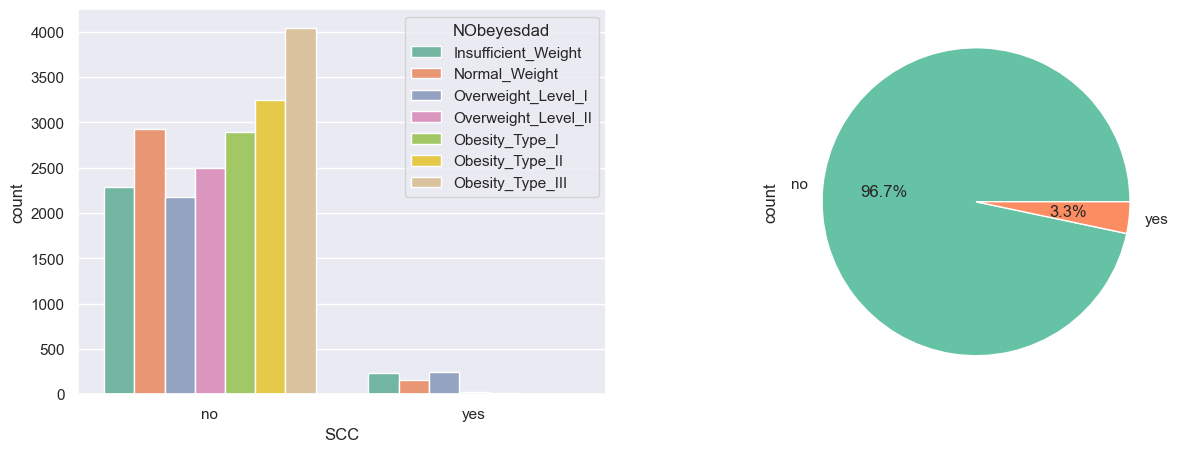

====================================================== FAF =======================================================



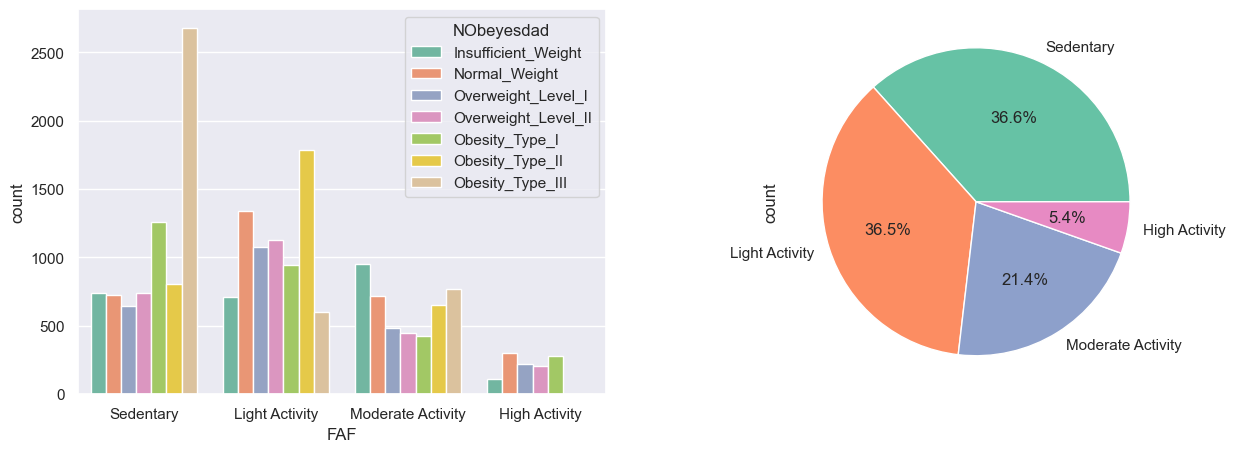

====================================================== TUE =======================================================



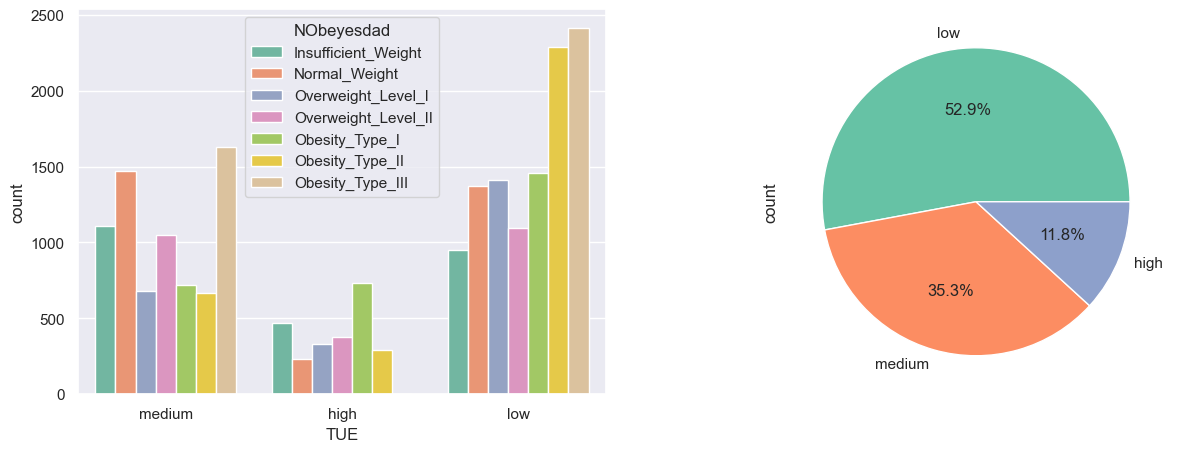

====================================================== CALC =======================================================



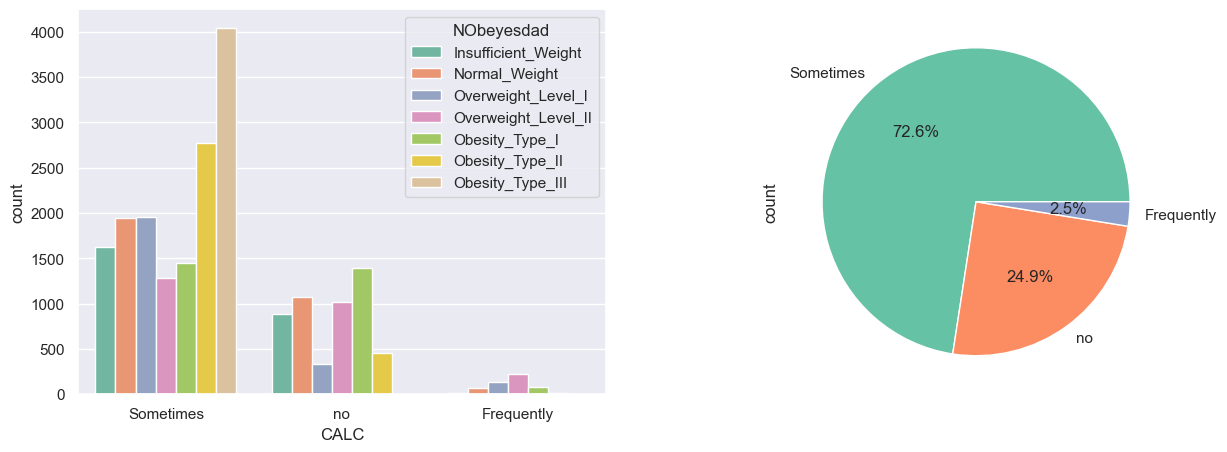

====================================================== MTRANS =======================================================



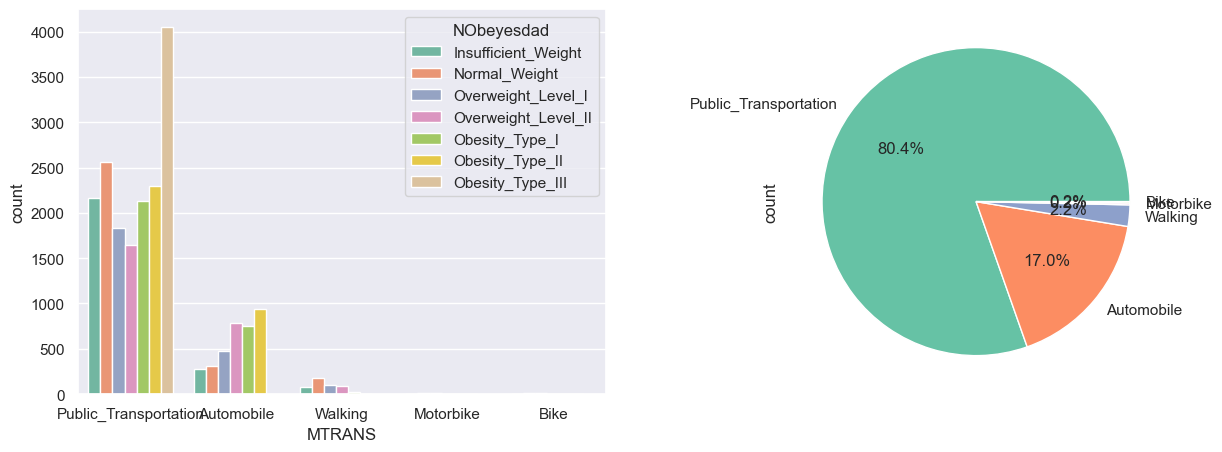

In [29]:
sns.set_palette("Set2")
for col in train_categorical_visualization.columns[:-1]:
    print(f"====================================================== {col} =======================================================\n")
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.countplot(data=train_categorical_visualization, x=col, hue='NObeyesdad',hue_order=category_order)
    plt.subplot(1,2,2)
    train_categorical_visualization[col].value_counts().plot(kind='pie', autopct="%1.1f%%")
    plt.show()

In [30]:
encoder = OrdinalEncoder(categories=[['Male', 'Female'], ['no', 'yes'], ['no', 'yes'], ['low', 'medium', 'high'], ['no', 'Sometimes', 'Frequently', 'Always'], ['no', 'yes'], ['low', 'medium', 'high'], ['no', 'yes'], ['Sedentary', 'Light Activity', 'Moderate Activity', 'High Activity'], ['low', 'medium', 'high'], ['no', 'Sometimes', 'Frequently'], ['Walking', 'Bike', 'Motorbike', 'Automobile', 'Public_Transportation'], ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']])                            
train_categorical_visualization_encoder = encoder.fit_transform(train_categorical_visualization)
train_categorical_visualization_encoder = pd.DataFrame(train_categorical_visualization_encoder, columns=train_categorical_visualization.columns)

In [31]:
train_categorical_visualization_encoder

,Gender,family_history_with_overweight,FAVC,FCVC,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,4.0,3.0
1,1.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0
2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,4.0,0.0
3,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,4.0,6.0
4,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,5.0
20754,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,2.0,1.0,1.0,4.0,0.0
20755,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0,5.0
20756,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,3.0


In [32]:
train_visualization_encoder = pd.concat([train_numeric_visualization, train_categorical_visualization_encoder], axis=1)

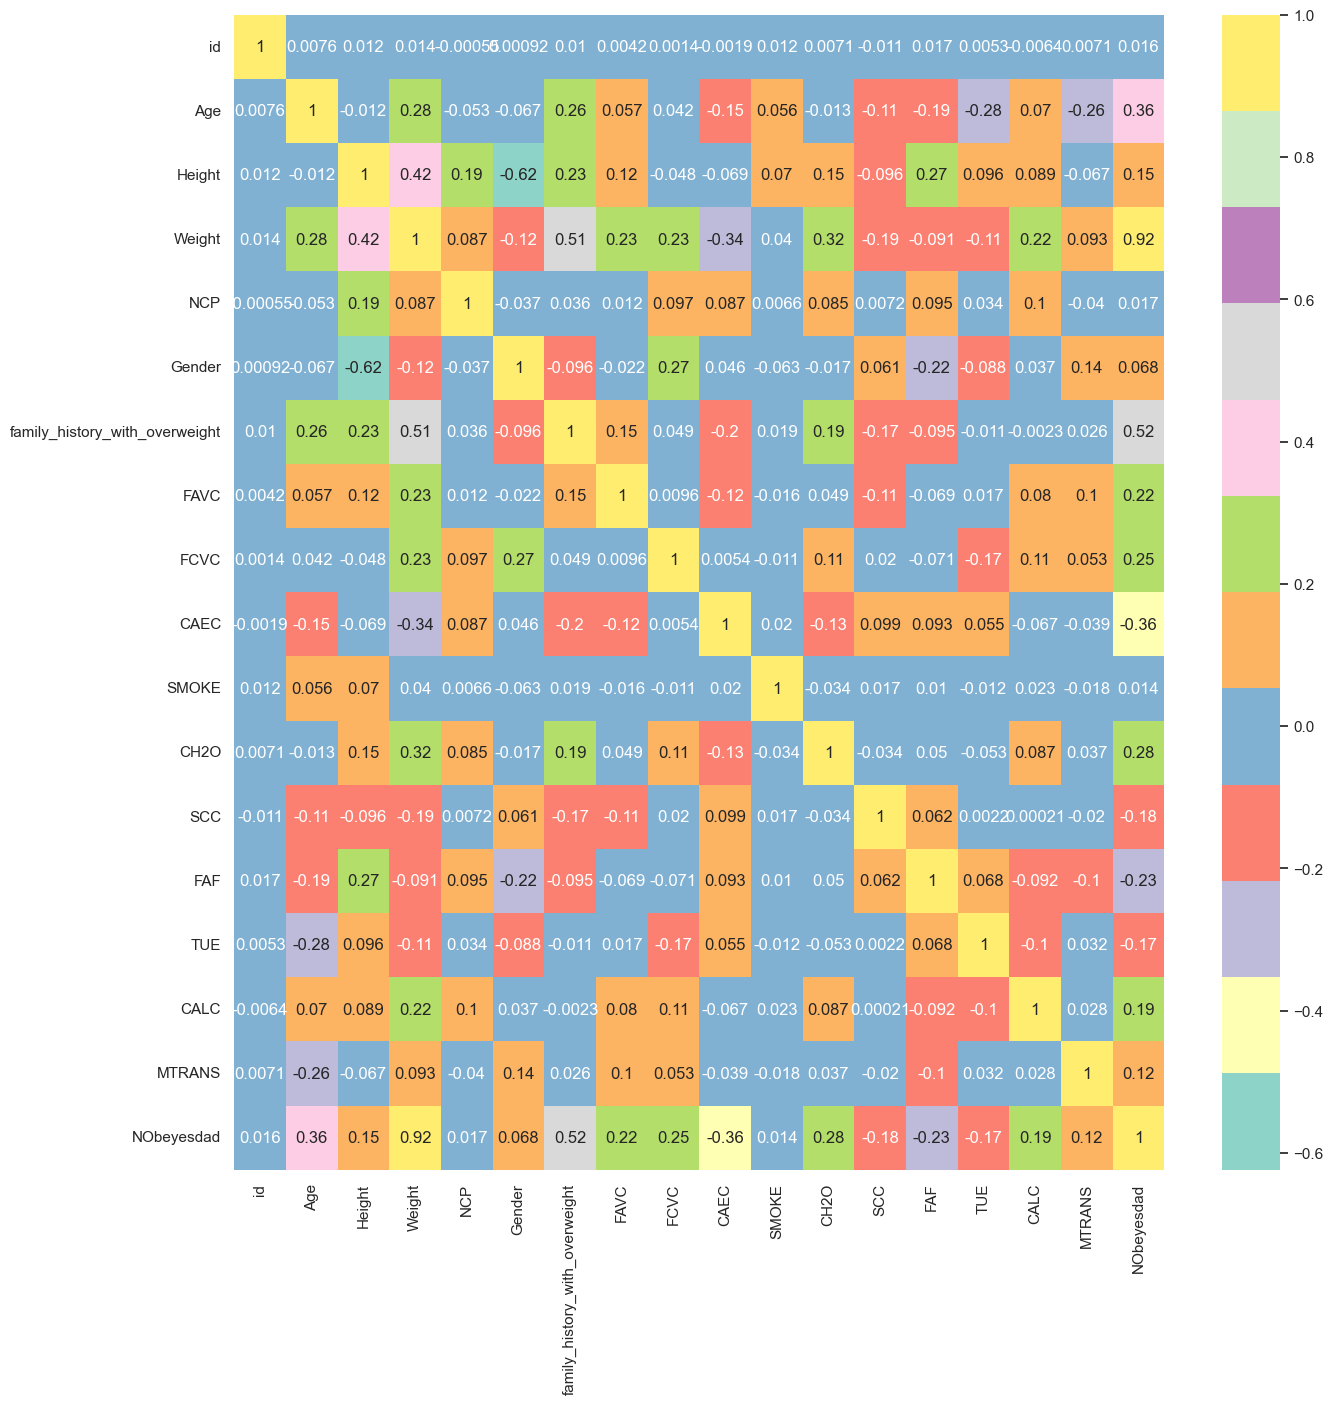

In [33]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=train_visualization_encoder.corr(), annot=True,cmap="Set3");

In [34]:
dict_vis.values()

dict_values(['id', 'high_cal_consumption', 'vegetable_consumption', 'meals_number', 'eating_between_meals', 'water_consumption', 'calorie_monitoring', 'physical_activity', 'screen_time', 'alcohole_consumption', 'transportation_mode', 'obesity_level'])

In [35]:
lis_vis = ['id','Age','Height','Weight','Meals_per_day','Gender','family_history_with_overweight','high_cal_consumption', 'vegetable_consumption', 'meals_number', 'eating_between_meals', 'water_consumption', 'calorie_monitoring', 'physical_activity', 'screen_time', 'alcohole_consumption', 'transportation_mode', 'obesity_level']

<Axes: >

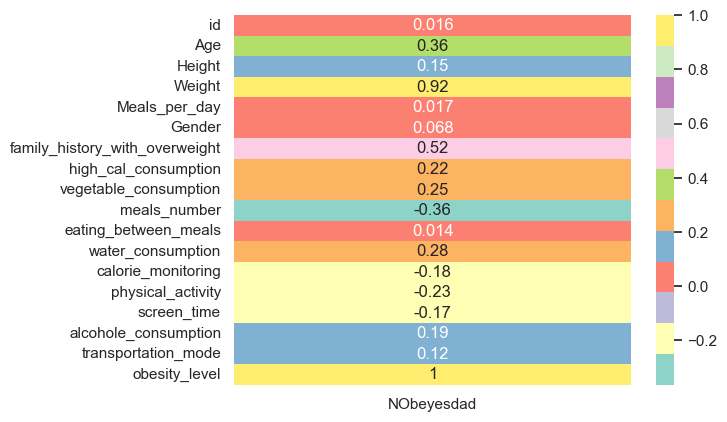

In [36]:
sns.heatmap(train_visualization_encoder.corr()[['NObeyesdad']],annot=True,cmap='Set3',yticklabels=lis_vis)

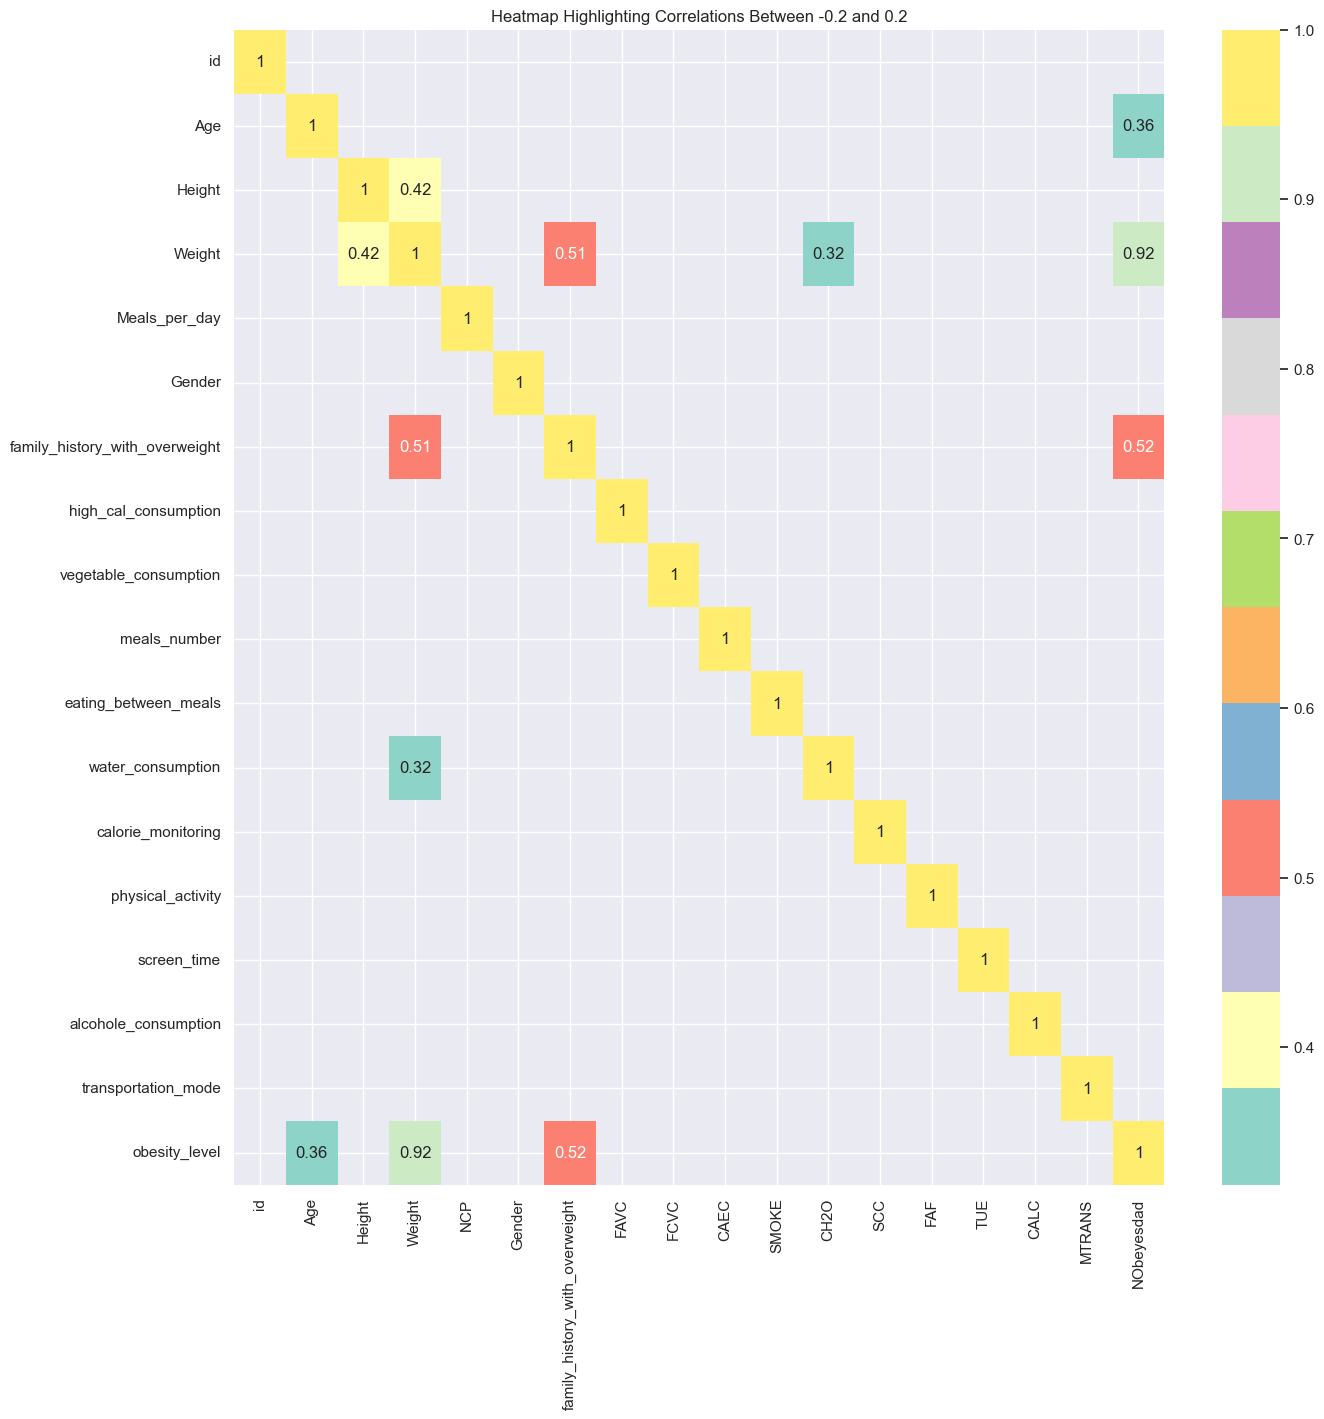

In [37]:
# Compute the correlation matrix
corr_matrix = train_visualization_encoder.corr()

# Create a mask to highlight only values between -0.2 and 0.2
mask = (corr_matrix < 0.3) | (corr_matrix > 1)  # Mask values outside the range

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap="Set3", mask=mask,yticklabels=lis_vis)

plt.title("Heatmap Highlighting Correlations Between -0.2 and 0.2")
plt.show()



<h1 style="background-color:rgb(218, 199, 198); font-family: newtimeroman; font-size: 100%; color: black; border-radius: 80px 20px; padding: 25px; text-align: left;">
<b>

 `pd.corr()` calculate the linear correlation between each 2 variables so we need to draw the scatter plot between variables to make sure there is littel to no relationship between them
 </b>
</h1>

In [38]:
train_visualization_encoder.head()


,id,Age,Height,Weight,NCP,Gender,family_history_with_overweight,FAVC,FCVC,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,24.443011,1.699998,81.669950,3,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,4.0,3.0
1,1,18.000000,1.560000,57.000000,3,1.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0
2,2,18.000000,1.711460,50.165754,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,4.0,0.0
3,3,20.952737,1.710730,131.274851,3,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,4.0,6.0
4,4,31.641081,1.914186,93.798055,2,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,4.0,3.0


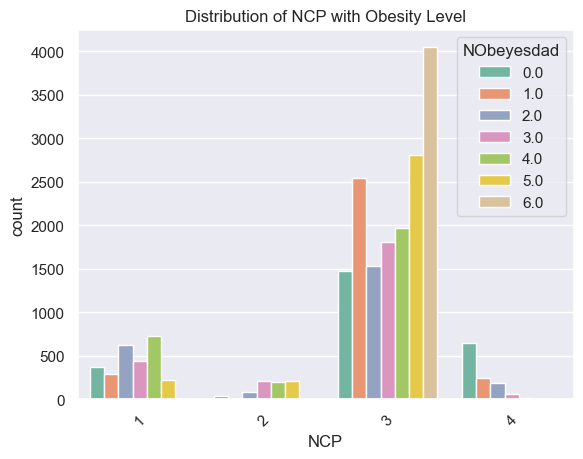

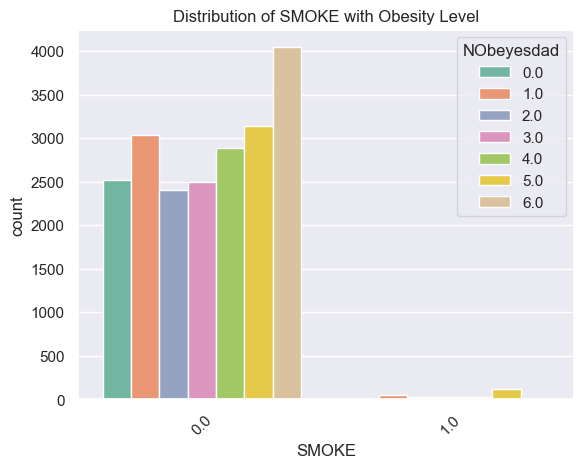

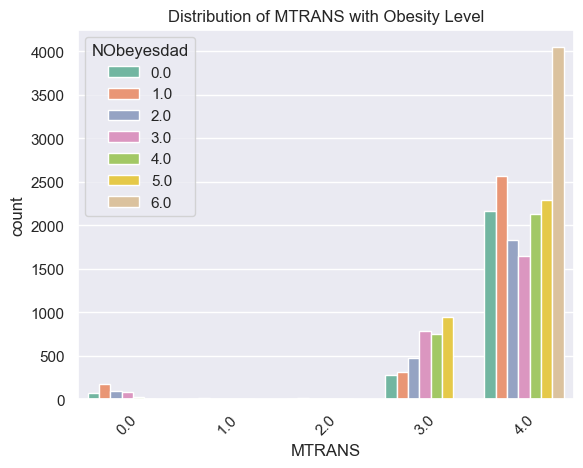

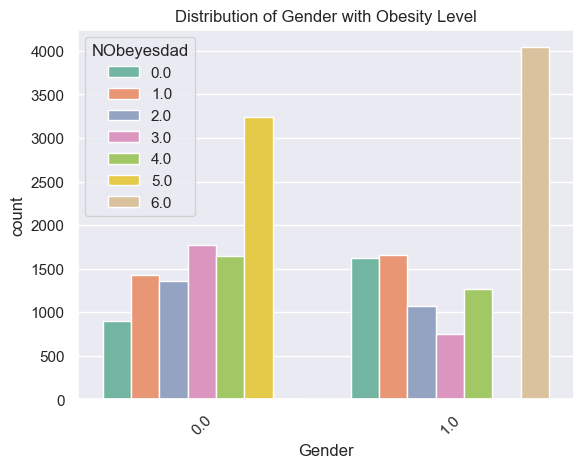

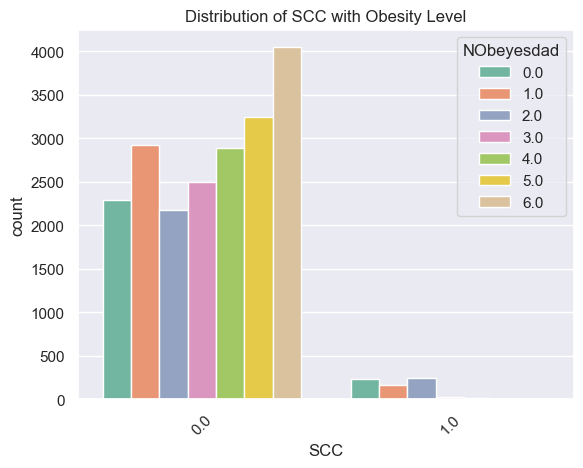

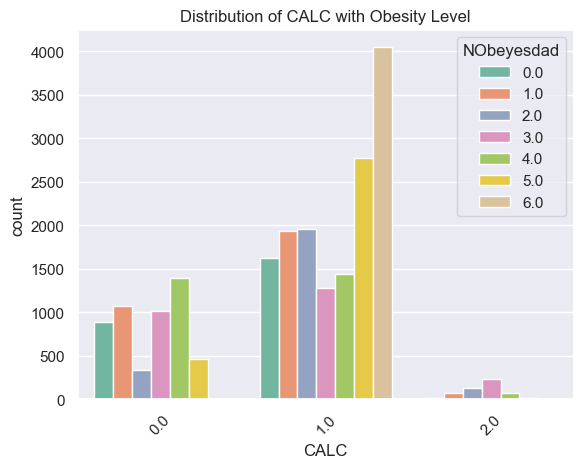

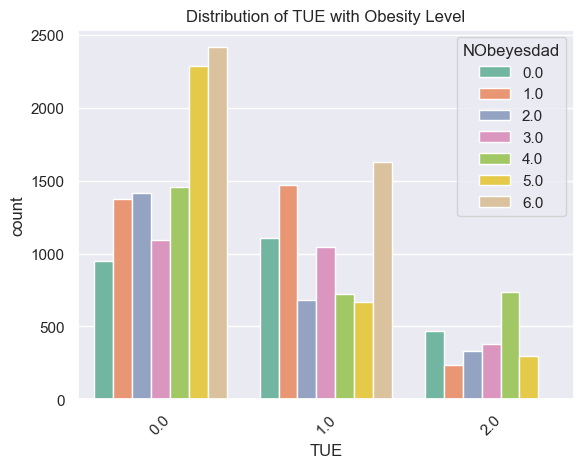

In [39]:
list_to_scatter = ['NCP','SMOKE','MTRANS','Gender','SCC','CALC','TUE']
for col in list_to_scatter:
    sns.countplot(hue=train_visualization_encoder['NObeyesdad'],x=train_visualization_encoder[col],palette='Set2')
    plt.title(f"Distribution of {col} with Obesity Level");
    plt.xticks(rotation=45)
    plt.show()


<h1 style="background-color:rgb(218, 199, 198); font-family: newtimeroman; font-size: 100%; color: black; border-radius: 80px 20px; padding: 25px; text-align: left;">
<b> from that we can remove columns with low variability and relativley low correlation with input

`id`, `SMOKE`,`MTRANS`,`SCC`
 </b>
</h1>

## Multivariate

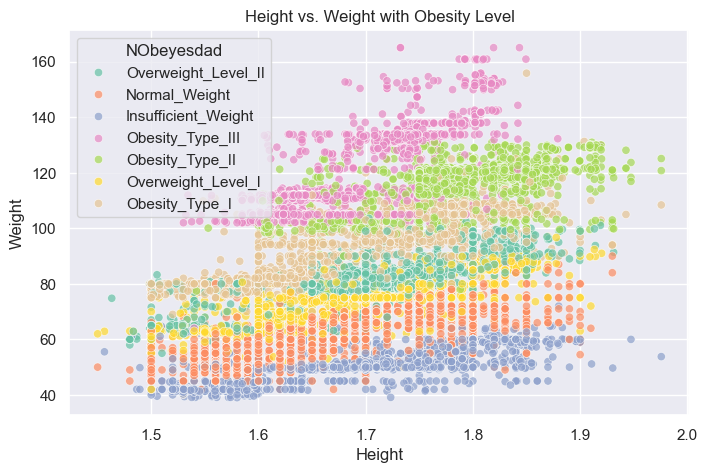

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Height'], y=df['Weight'], hue=df['NObeyesdad'], alpha=0.7)
plt.title("Height vs. Weight with Obesity Level")
plt.show()

In [41]:
def calculate_bmr(weight, height, age, gender, activity_level):
    """
    Calculate BMR using Mifflin-St Jeor Equation and estimate daily calorie needs.
    Parameters:
    - weight: Weight in kg
    - height: Height in cm
    - age: Age in years
    - gender: "male" or "female"
    - activity_level: 0 (Sedentary), 1 (Light), 2 (Moderate), 3 (Very Active)
    Returns:
    - BMR (Basal Metabolic Rate)
    - TDEE (Total Daily Energy Expenditure)
    """
    
    # BMR Calculation
    if gender == 0: # male
        bmr = (10 * weight) + (625 * height) - (5 * age) + 5
    elif gender == 1: # female
        bmr = (10 * weight) + (625 * height) - (5 * age) - 161
    else:
        return None, None  # Handle invalid gender gracefully

    # Activity Factor Mapping (Based on FAF scale)
    activity_factors = {0: 1.2, 1: 1.375, 2: 1.55, 3: 1.725}  # Matching your dataset
    
    # Ensure valid activity level
    activity_multiplier = activity_factors.get(activity_level, 1.2)  # Default to sedentary if missing

    # Calculate Total Daily Energy Expenditure (TDEE)
    tdee = bmr * activity_multiplier
    
    return round(bmr, 2), round(tdee, 2)

# Apply to DataFrame
train_visualization_encoder[['BMR', 'TDEE']] = train_visualization_encoder.apply(
    lambda row: calculate_bmr(row['Weight'], row['Height'], row['Age'], row['Gender'], row['FAF']),
    axis=1, result_type="expand"
)

# Display results
print(train_visualization_encoder[['Weight', 'Height', 'Age', 'Gender', 'FAF', 'BMR', 'TDEE']].head())
train_visualization_encoder.head()

       Weight    Height        Age  Gender  FAF      BMR     TDEE
0   81.669950  1.699998  24.443011     0.0  0.0  1761.98  2114.38
1   57.000000  1.560000  18.000000     1.0  1.0  1294.00  1779.25
2   50.165754  1.711460  18.000000     1.0  1.0  1320.32  1815.44
3  131.274851  1.710730  20.952737     1.0  1.0  2116.19  2909.76
4   93.798055  1.914186  31.641081     0.0  2.0  1981.14  3070.77


,id,Age,Height,Weight,NCP,Gender,family_history_with_overweight,FAVC,FCVC,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMR,TDEE
0,0,24.443011,1.699998,81.669950,3,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,4.0,3.0,1761.98,2114.38
1,1,18.000000,1.560000,57.000000,3,1.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0,1294.00,1779.25
2,2,18.000000,1.711460,50.165754,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,4.0,0.0,1320.32,1815.44
3,3,20.952737,1.710730,131.274851,3,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,4.0,6.0,2116.19,2909.76
4,4,31.641081,1.914186,93.798055,2,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,4.0,3.0,1981.14,3070.77


<Axes: >

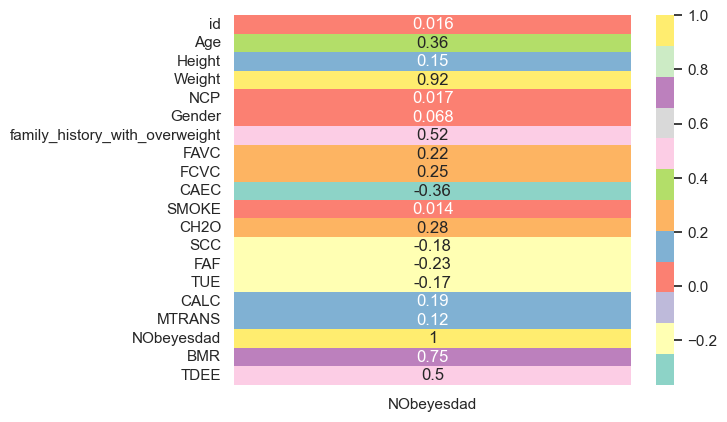

In [42]:
sns.heatmap(train_visualization_encoder.corr()[['NObeyesdad']],annot=True,cmap='Set3')

# `05` Data Splitting

In [43]:
#X = df.drop(columns=['NObeyesdad','id','SMOKE','MTRANS','SCC'])
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

In [44]:
numerical_features = list(X.select_dtypes('number').columns)
catgorical_features = list(X.select_dtypes('object').columns)


In [45]:
x_train, x_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42,stratify=y,shuffle=True)

# `06` Preprocessing

In [46]:
# funciton that make equal-width-binning on the scaling columns
def equal_width_binning(data:pd.DataFrame, col_name:str, bins:int, labels:list, object:int):
    data = data.copy()
        
    # convert the column from categorical to object datatype
    if object == 1:
        data[col_name] = pd.cut(data[col_name], bins=bins, labels=labels)
        data[col_name] = data[col_name].astype('object')
        return data[col_name]
    
    # convert the column from categorical to integer datatype
    elif object == 0:
        data[col_name] = pd.cut(data[col_name], bins=bins, labels=labels)
        data[col_name] = data[col_name].astype('int32')
        return data[col_name]  

In [47]:
def preprocess_data(data:pd.DataFrame):
    # Reset The index
    #data = data.reset_index()
    #data.drop(columns=['index'], inplace=True)

    # Rename the columns
    data_preprocess = data.copy()



    # Drop id Column
    #data_preprocess.drop(columns=['id'], inplace=True)

    # Numeric Columns ['Age', 'Height', 'Weight']
    # Age Column -> Round to the nearest integer and then convert the datatype to int32 
    data_preprocess['Age'] = data_preprocess['Age'].round().astype('int32')

    # Height Column -> Round to the nearest 2 floating points 
    data_preprocess['Height'] = data_preprocess['Height'].round(2)

    # Weight Column -> Round to the nearest 2 floating points
    data_preprocess['Weight'] = data_preprocess['Weight'].round(2)

    # Scaling Columns [vegetable_consumption, meals_number, water_consumption, physical_activity, screen_time]
    # make equal width binning
    # Apply Function on [vegetable_consumption, screen_time, water_consumption]
    target_columns = ['FCVC', 'TUE', 'CH2O']
    for col in target_columns:
        data_preprocess[col] = equal_width_binning(data_preprocess, col, 3, ['low', 'medium', 'high'], object=1)

    # Apply Function on physical_activity
    data_preprocess['FAF'] = equal_width_binning(data_preprocess, 'FAF', 4, ['Sedentary', 'Light Activity', 'Moderate Activity', 'High Activity'], object=1)

    # Apply Function on meals_number
    data_preprocess['NCP'] = equal_width_binning(data_preprocess, 'NCP', 4, [1, 2, 3, 4], object=0)
    
    return data_preprocess

In [48]:
df_ = X.copy()
transformed = preprocess_data(df_)

In [49]:
num_features = list(transformed.select_dtypes('number').columns)
cat_features = list(transformed.select_dtypes('object').columns)

cat_features

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS']

In [50]:
custom_transformer = FunctionTransformer(preprocess_data, validate=False) #validate=False: Prevents unnecessary checks (recommended when using Pandas).

num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('encoder', OrdinalEncoder(categories=[['Male', 'Female'], ['no', 'yes'], ['no', 'yes'], 
                                                    ['low', 'medium', 'high'], ['no', 'Sometimes', 'Frequently', 'Always'], 
                                                    ['no', 'yes'], ['low', 'medium', 'high'], ['no', 'yes'], 
                                                    ['Sedentary', 'Light Activity', 'Moderate Activity', 'High Activity'], 
                                                    ['low', 'medium', 'high'], ['no', 'Sometimes', 'Frequently'], 
                                                    ['Walking', 'Bike', 'Motorbike', 'Automobile', 'Public_Transportation']] )
)])

# Column Transformer
scaling_encoding = ColumnTransformer([
    ('cat', cat_pipeline, cat_features),  # Ordinal encoding for categorical columns
    ('num', num_pipeline, num_features),  # Standard scaling for numerical columns
])

#Create Full Pipeline
preprocessor = Pipeline([
    ('custom_preprocessing', custom_transformer),
    ('scaling_and_encoding', scaling_encoding)
])

In [51]:
#df_ = custom_transformer.fit_transform(transformed_data)
encoded_data  = preprocessor.fit_transform(x_train)
encoded_data

array([[ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.16012566e-01,  8.08486960e-02, -2.35880585e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
        -6.82231350e-01, -4.11158677e-01, -2.35880585e+00],
       [ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.14232617e+00, -1.20593982e+00,  1.66692179e+00],
       ...,
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
        -1.36644042e+00, -1.47086686e+00,  3.25012577e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
        -1.59451011e+00, -4.06238603e-01,  3.25012577e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.97772103e-03, -1.08384909e-01,  3.25012577e-01]])

In [52]:
x_train_transformed = preprocessor.fit_transform(x_train) # unesssary if we are going to a full ml_pipeline

# Convert back to DataFrame
x_train_transformed = pd.DataFrame(x_train_transformed, columns=numerical_features + catgorical_features)


In [53]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [54]:
x_test_transformed = preprocessor.transform(x_test) # unesssary if we are going to a full ml_pipeline

# Convert back to DataFrame
x_test_transformed = pd.DataFrame(x_test_transformed, columns=numerical_features + catgorical_features)


In [55]:
# y_test encoding
y_test_encoded = label_encoder.transform(y_test)

In [56]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:", label_mapping)

Label Encoding Mapping: {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


# Models Training 

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 

In [ ]:
# grid search to find the best hyperparameters on the logistic regression model

param_grid = {
    'C': [0.01,0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.1, 0.5, 0.9],}

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_transformed, y_train_encoded)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_    
y_pred = best_model.predict(x_test_transformed)
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

# Best Hyperparameters: {'C': 10, 'l1_ratio': 0.5, 'penalty': 'l1', 'solver': 'saga'}
# Accuracy: 0.865606936416185

c:\Users\aliay\OneDrive\Desktop\Github-zone\ML-Project-Obesity-Risk\env\lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\aliay\OneDrive\Desktop\Github-zone\ML-Project-Obesity-Risk\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.865606936416185
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       538
           1       0.82      0.88      0.85       575
           2       0.84      0.81      0.82       606
           3       0.96      0.94      0.95       663
           4       1.00      0.99      0.99       814
           5       0.71      0.72      0.72       478
           6       0.69      0.73      0.71       478

    accuracy                           0.87      4152
   macro avg       0.85      0.85      0.85      4152
weighted avg       0.87      0.87      0.87      4152



<Axes: >

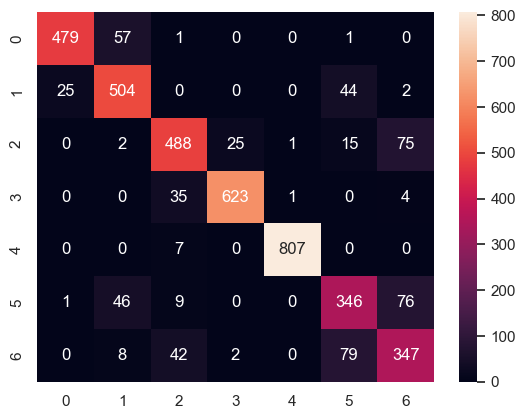

In [63]:
# Applying Logistic Regression
LR = LogisticRegression(C=10, l1_ratio=0.5, penalty='l1', solver='saga')
LR.fit(x_train_transformed, y_train_encoded)
y_pred = LR.predict(x_test_transformed)
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)
print(f"Classification Report : \n{classification_report(y_pred,y_test_encoded)}")
sns.heatmap(confusion_matrix(y_pred,y_test_encoded),annot=True,fmt='d')

In [ ]:
# make a grid search on Desision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10 , None],
    'min_samples_split': [10 , 15 , 20 , 30],
    'min_samples_leaf': [2, 4 , 8 , 13],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1],
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_transformed, y_train_encoded)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_transformed)
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

# Best Hyperparameters: {'ccp_alpha': 0.001, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
# Accuracy: 0.8774084778420038

Best Hyperparameters: {'ccp_alpha': 0.001, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.8774084778420038


Accuracy: 0.8774084778420038
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       503
           1       0.86      0.80      0.83       661
           2       0.87      0.84      0.85       600
           3       0.96      0.95      0.95       656
           4       1.00      1.00      1.00       809
           5       0.71      0.76      0.74       450
           6       0.75      0.80      0.78       473

    accuracy                           0.88      4152
   macro avg       0.86      0.87      0.86      4152
weighted avg       0.88      0.88      0.88      4152



<Axes: >

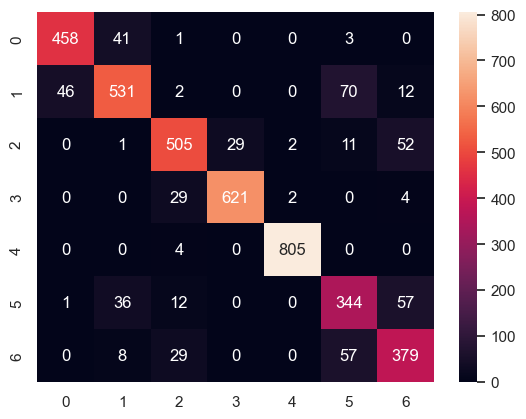

In [65]:
# applying Decision Tree
DT = DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='entropy', max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10)
DT.fit(x_train_transformed, y_train_encoded)
y_pred = DT.predict(x_test_transformed)
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)
print(f"Classification Report : \n{classification_report(y_pred,y_test_encoded)}")
sns.heatmap(confusion_matrix(y_pred,y_test_encoded),annot=True,fmt='d')

In [ ]:
# grid search on KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [ 7, 9 , 15 , 25 ],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30 , 40],
    'p': [1, 2],
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_transformed, y_train_encoded)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_transformed)
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

# Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
# Accuracy: 0.815028901734104


Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}


c:\Users\aliay\OneDrive\Desktop\Github-zone\ML-Project-Obesity-Risk\env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\aliay\OneDrive\Desktop\Github-zone\ML-Project-Obesity-Risk\env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\aliay\AppData\Local\Programs\Python\Python38\lib\subprocess.py", line 489, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\aliay\AppData\Local\Programs\Python\Python38\lib\subprocess.py", line 854, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\aliay\AppData\Local\Pr

Accuracy: 0.815028901734104


Accuracy: 0.815028901734104
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       516
           1       0.73      0.74      0.74       606
           2       0.80      0.76      0.78       615
           3       0.94      0.89      0.92       687
           4       1.00      0.97      0.98       830
           5       0.56      0.66      0.60       411
           6       0.66      0.68      0.67       487

    accuracy                           0.82      4152
   macro avg       0.80      0.80      0.79      4152
weighted avg       0.82      0.82      0.82      4152



<Axes: >

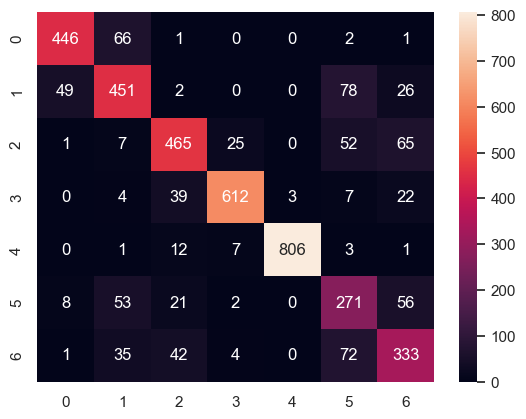

In [67]:
# applying KNN algorithm
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=20, n_neighbors=15, p=1, weights='distance')
KNN.fit(x_train_transformed, y_train_encoded)
y_pred = KNN.predict(x_test_transformed)
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)
print(f"Classification Report : \n{classification_report(y_pred,y_test_encoded)}")
sns.heatmap(confusion_matrix(y_pred,y_test_encoded),annot=True,fmt='d')

In [ ]:
# Apply grid search on LightGBM
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [ 110 , 150],        # number of trees
    'max_depth': [10 ,15 ],
    'min_child_samples': [20,25,35], #The minimum number of samples required to create a new child in a split
    'colsample_bytree': [0.6,0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
}

grid_search = GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_transformed, y_train_encoded)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_transformed)
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

# Best Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_samples': 25, 'n_estimators': 110, 'reg_alpha': 0.5}
# Accuracy: 0.9051059730250481

# Best Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 15, 'min_child_samples': 20, 'n_estimators': 200, 'reg_alpha': 0.5}
# Accuracy: 0.9092369942196532

c:\Users\aliay\OneDrive\Desktop\Github-zone\ML-Project-Obesity-Risk\env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\aliay\OneDrive\Desktop\Github-zone\ML-Project-Obesity-Risk\env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\aliay\AppData\Local\Programs\Python\Python38\lib\subprocess.py", line 489, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\aliay\AppData\Local\Programs\Python\Python38\lib\subprocess.py", line 854, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\aliay\AppData\Local\Pr

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 17
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.907572
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.855022
[LightGBM] [Info] Start training from score -1.635117
[LightGBM] [Info] Start training from score -2.146046
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 17
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.907572
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.855022
[LightGBM] [Info] Start training from score -1.635117
[LightGBM] [Info] Start training from score -2.146046
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

<Axes: >

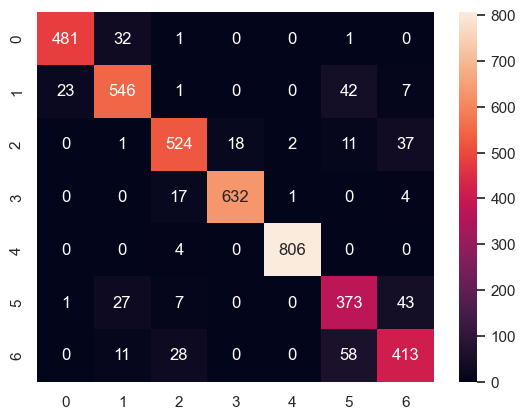

In [77]:
# Applyig LightGBM
lgbm = LGBMClassifier(colsample_bytree=0.6, learning_rate=0.05, max_depth=15, min_child_samples=20, n_estimators=200, reg_alpha=0.5)
lgbm.fit(x_train_transformed, y_train_encoded)
y_pred = lgbm.predict(x_test_transformed)
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)
print(f"Classification Report : \n{classification_report(y_pred,y_test_encoded)}")
sns.heatmap(confusion_matrix(y_pred,y_test_encoded),annot=True,fmt='d')

In [ ]:
# def models(model,x_train,y_train,x_test,y_test):
#     model.fit(x_train,y_train)
#     y_pred=model.predict(x_test)
#     accuracy=accuracy_score(y_pred,y_test)
#     print(f"Accuracy : {accuracy}")
#     print(f"Classification Report : \n{classification_report(y_pred,y_test)}")
#     sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='d')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 17
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
Accuracy : 0.9067919075144508
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       522
           1       0.86      0.90      0.88       593
           2       0.89      0.90      0.89       575
           3       0.98      0.97      0.97       654
        

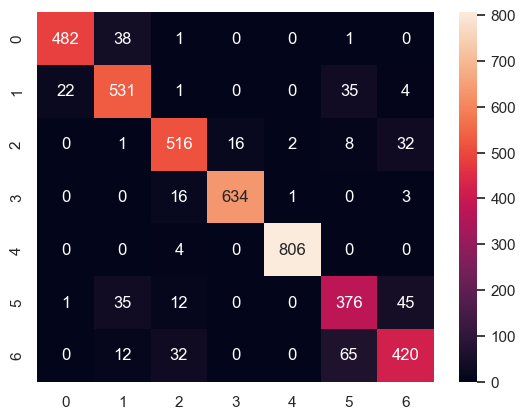

In [ ]:
# models(lgbm, x_train_transformed, y_train_encoded, x_test_transformed, y_test_encoded)

# Tuning

# Insights and Conclusions
